# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [222]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

import time
from tqdm import tqdm
import os
import pickle

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [223]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [224]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [225]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [226]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
print(resource_data.head(2))

# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'quantity':'sum', 'price':'sum'}).reset_index()

# Join two data frames
project_data = pd.merge(project_data, price_data, on='id', how='left')
project_data.head(5)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']
        id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95  


Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
2       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
3      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
4       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   
2           CA 2016-04-27 00:46:53          Grades PreK-2   
3           GA 2016-04-27 00:53:00          Grades PreK-2   
4           WA 2016-04-27 01:05:25             Grades 3-5   

  project_subject_categories            project_subject_subcategories  \
0             Math & Science  Applied Sciences, Health & Life Science   
1              Special Needs                            Special Needs   
2        Literacy & Language                                 Literacy   
3           Applied Learning                        Early Development   
4        Literacy & Language                                 Literacy   

                                    project_title  \
0    Engineering STEAM into the Primary Classroom   
1                         Sensory Tools for Focus   
2  Mobile Learning with a Mobile Listening Center   
3          Flexible Seating for Flexible Learning   
4          Going Deep: The Art of Inner Thinking!   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   
2  Having a class of 24 students comes with diver...   
3  I recently read an article about giving studen...   
4  My students crave challenge, they eat obstacle...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   
2  I have a class of twenty-four kindergarten stu...   
3  I teach at a low-income (Title 1) school. Ever...   
4  We are an urban, public k-5 elementary school....   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   
2  By having a mobile listening and storage cente...   
3  We need a classroom rug that we can use as a c...   
4  With the new common core standards that have b...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   
2  A mobile listening center will help keep equip...   
3  Benjamin Franklin once said, \"Tell me and I f...   
4  These remarkable gifts will provide students w...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   
2  My students need a mobile listening center to ...   
3  My students need flexible seating in the class...   
4  My students need copies of the New York Times ...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   
2                                            10                    1   
3                                             2                    1   
4                                             2                    1   

   quantity   price  
0         4  725.05  
1         8  213.03  
2         1  329.00  
3         9  481.04  
4        14   17.74

## 1.2 preprocessing of `project_subject_categories`

In [227]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [228]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [229]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [230]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   

   quantity   price clean_categories                 clean_subcategories  \
0         4  725.05     Math_Science  AppliedSciences Health_LifeScience   
1         8  213.03     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  I have been fortunate enough to use the Fairy ...  
1  Imagine being 8-9 years old. You're in your th...

In [231]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [232]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [233]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [234]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [235]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [236]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [237]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [238]:
# Create function that will filter sentance
def filterSentance(sentance):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = sent.lower()
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    return sent.strip()

In [239]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    preprocessed_essays.append(filterSentance(sentance))

100%|██████████| 109248/109248 [01:09<00:00, 1576.94it/s]


In [240]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [241]:
# similarly you can preprocess the titles also
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    preprocessed_titles.append(filterSentance(sentance))

100%|██████████| 109248/109248 [00:06<00:00, 18094.37it/s]


In [242]:
# after preprocessing
print(preprocessed_titles[20000])

health nutritional cooking kindergarten


In [243]:
# similarly you can preprocess the project_resource_summary also
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_resource_summary = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_resource_summary'].values):
    preprocessed_resource_summary.append(filterSentance(sentance))

100%|██████████| 109248/109248 [00:10<00:00, 10799.89it/s]


In [244]:
# after preprocessing
print(preprocessed_resource_summary[20000])

students need cooking supplies help us healthy learn nutrition mixer apple spiralizer kitchen tools nutrition kit kid friendly healthy literature ink make cookbooks


In [245]:
# Preprocess teacher_prefix
from tqdm import tqdm
preprocessed_teacher_prefix = []
# tqdm is for printing the status bar
for teacher_prefix in tqdm(project_data['teacher_prefix'].values):
    teacher_prefix = str(teacher_prefix)
    clean_teacher_prefix = decontracted(teacher_prefix)
    clean_teacher_prefix = clean_teacher_prefix.replace('\\r', ' ')
    clean_teacher_prefix = clean_teacher_prefix.replace('\\"', ' ')
    clean_teacher_prefix = clean_teacher_prefix.replace('\\n', ' ')
    clean_teacher_prefix = re.sub('[^A-Za-z0-9]+', ' ', clean_teacher_prefix)
    clean_teacher_prefix = clean_teacher_prefix.lower()
    if clean_teacher_prefix in stopwords:
        continue
    preprocessed_teacher_prefix.append(clean_teacher_prefix.strip())

100%|██████████| 109248/109248 [00:02<00:00, 45904.99it/s]


In [246]:
preprocessed_teacher_prefix[0:10]

['mrs', 'ms', 'mrs', 'mrs', 'mrs', 'mrs', 'mrs', 'ms', 'ms', 'mrs']

In [247]:
# Preprocess project_grade_category
from tqdm import tqdm
preprocessed_project_grade_category = []
# tqdm is for printing the status bar
for project_grade_category in tqdm(project_data['project_grade_category'].values):
    project_grade_category = str(project_grade_category)
    clean_project_grade_category = decontracted(project_grade_category)
    clean_project_grade_category = clean_project_grade_category.replace('\\r', ' ')
    clean_project_grade_category = clean_project_grade_category.replace('\\"', ' ')
    clean_project_grade_category = clean_project_grade_category.replace('\\n', ' ')
    clean_project_grade_category = re.sub('[^A-Za-z0-9]+', ' ', clean_project_grade_category)
    clean_project_grade_category = clean_project_grade_category.lower()
    if clean_project_grade_category in stopwords:
        continue
    clean_project_grade_category = clean_project_grade_category.strip()
#     whitespace are creating problems because we are treating this as categorical feature    
    preprocessed_project_grade_category.append(clean_project_grade_category.replace(' ', '_'))

100%|██████████| 109248/109248 [00:01<00:00, 58878.88it/s]


In [248]:
preprocessed_project_grade_category[0:10]

['grades_prek_2',
 'grades_3_5',
 'grades_prek_2',
 'grades_prek_2',
 'grades_3_5',
 'grades_3_5',
 'grades_3_5',
 'grades_3_5',
 'grades_prek_2',
 'grades_3_5']

In [249]:
# Replace original columns with preprocessed column values
project_data['clean_essays'] = preprocessed_essays
project_data['clean_titles'] = preprocessed_titles
project_data['project_resource_summary'] = preprocessed_resource_summary
project_data['teacher_prefix'] = preprocessed_teacher_prefix
project_data['project_grade_category'] = preprocessed_project_grade_category
# Drop essays column
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

In [250]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5            mrs   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df             ms   
2       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73            mrs   
3      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3            mrs   
4       33679  p137682  06f6e62e17de34fcf81020c77549e1d5            mrs   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          grades_prek_2   
1           UT 2016-04-27 00:31:25             grades_3_5   
2           CA 2016-04-27 00:46:53          grades_prek_2   
3           GA 2016-04-27 00:53:00          grades_prek_2   
4           WA 2016-04-27 01:05:25             grades_3_5   

                                    project_title  \
0    Engineering STEAM into the Primary Classroom   
1                         Sensory Tools for Focus   
2  Mobile Learning with a Mobile Listening Center   
3          Flexible Seating for Flexible Learning   
4          Going Deep: The Art of Inner Thinking!   

                            project_resource_summary  \
0  students need stem kits learn critical science...   
1  students need boogie boards quiet sensory brea...   
2  students need mobile listening center able enh...   
3  students need flexible seating classroom choos...   
4  students need copies new york times best selle...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   
2                                            10                    1   
3                                             2                    1   
4                                             2                    1   

   quantity   price   clean_categories                 clean_subcategories  \
0         4  725.05       Math_Science  AppliedSciences Health_LifeScience   
1         8  213.03       SpecialNeeds                        SpecialNeeds   
2         1  329.00  Literacy_Language                            Literacy   
3         9  481.04    AppliedLearning                    EarlyDevelopment   
4        14   17.74  Literacy_Language                            Literacy   

                                               essay  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   
2  Having a class of 24 students comes with diver...   
3  I recently read an article about giving studen...   
4  My students crave challenge, they eat obstacle...   

                                        clean_essays  \
0  fortunate enough use fairy tale stem kits clas...   
1  imagine 8 9 years old third grade classroom se...   
2  class 24 students comes diverse learners stude...   
3  recently read article giving students choice l...   
4  students crave challenge eat obstacles breakfa...   

                              clean_titles  
0      engineering steam primary classroom  
1                      sensory tools focus  
2  mobile learning mobile listening center  
3       flexible seating flexible learning  
4            going deep art inner thinking

In [251]:
project_data.tail(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
109243       45036  p194916  29cf137e5a40b0f141d9fd7898303a5c            mrs   
109244       12610  p162971  22fee80f2078c694c2d244d3ecb1c390             ms   
109245      179833  p096829  c8c81a73e29ae3bdd4140be8ad0bea00            mrs   
109246       13791  p184393  65545a295267ad9df99f26f25c978fd0            mrs   
109247      124250  p028318  1fff5a88945be8b2c728c6a85c31930f            mrs   

       school_state                Date project_grade_category  \
109243           HI 2017-04-30 23:11:45            grades_9_12   
109244           NM 2017-04-30 23:23:24          grades_prek_2   
109245           IL 2017-04-30 23:25:42             grades_3_5   
109246           HI 2017-04-30 23:27:07            grades_9_12   
109247           CA 2017-04-30 23:45:08          grades_prek_2   

                                            project_title  \
109243                Nanakuli Football Projection Screen   
109244                            Operation  Organization   
109245  Bringing Agriculture and Sustainability to the...   
109246                     Cricket Cutting Machine Needed   
109247                                      News for Kids   

                                 project_resource_summary  \
109243  students need projection screen use team meetings   
109244  students need organization supplies order clea...   
109245  students need 5 windows laptops students acces...   
109246  students need cricket machine help make displa...   
109247  students need subscription scholastic news mag...   

        teacher_number_of_previously_posted_projects  project_is_approved  \
109243                                             5                    1   
109244                                             3                    1   
109245                                             0                    1   
109246                                             1                    1   
109247                                             2                    1   

        quantity   price   clean_categories  \
109243         2  143.36      Health_Sports   
109244        10  268.57    AppliedLearning   
109245         5  399.00       Math_Science   
109246         4  287.73       Math_Science   
109247        25    5.50  Literacy_Language   

                         clean_subcategories  \
109243                            TeamSports   
109244                EarlyDevelopment Other   
109245  AppliedSciences EnvironmentalScience   
109246                    Health_LifeScience   
109247           Literacy Literature_Writing   

                                                    essay  \
109243  Our day starts with about 100 students athlete...   
109244  My students range from age four to five years ...   
109245  We are a Title 1 school  650 total students. O...   
109246  I teach many different types of students.  My ...   
109247  My first graders are eager to learn about the ...   

                                             clean_essays  \
109243  day starts 100 students athletes low income ba...   
109244  students range age four five years old attend ...   
109245  title 1 school 650 total students elementary s...   
109246  teach many different types students classes fu...   
109247  first graders eager learn world around come sc...   

                                             clean_titles  
109243                nanakuli football projection screen  
109244                             operation organization  
109245  bringing agriculture sustainability classroom ...  
109246                     cricket cutting machine needed  
109247                                          news kids

In [252]:
print(set(preprocessed_project_grade_category))

{'grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2'}


In [253]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('null')

In [254]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5            mrs   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df             ms   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          grades_prek_2   
1           UT 2016-04-27 00:31:25             grades_3_5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                            project_resource_summary  \
0  students need stem kits learn critical science...   
1  students need boogie boards quiet sensory brea...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   

   quantity   price clean_categories                 clean_subcategories  \
0         4  725.05     Math_Science  AppliedSciences Health_LifeScience   
1         8  213.03     SpecialNeeds                        SpecialNeeds   

                                               essay  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                        clean_essays  \
0  fortunate enough use fairy tale stem kits clas...   
1  imagine 8 9 years old third grade classroom se...   

                          clean_titles  
0  engineering steam primary classroom  
1                  sensory tools focus

## 1.5 Preparing data for models

In [255]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'quantity', 'price', 'clean_categories', 'clean_subcategories', 'essay',
       'clean_essays', 'clean_titles'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [256]:
print(project_data.shape)

# I am taking 30% of data points for my analysis
# AVGW2V and TFIDFW2V takes more time
# I am using macbook pro with 16GB of RAM but I didn't get AVGW2V result within 12 hrs for 50% of data. 
# So I switched to 30% of data
project_data = project_data.sample(frac=0.3)

print(project_data.shape)

(109248, 18)
(32774, 18)


In [257]:
# Splitting data
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
X = project_data
project_data.shape

(32774, 17)

In [258]:
# Split Train, CV and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

print('Train Data Set', X_train.shape, y_train.shape)
print('Cross Validate Data Set', X_cv.shape, y_cv.shape)
print('Test Data Set', X_test.shape, y_test.shape)

Train Data Set (14711, 17) (14711,)
Cross Validate Data Set (7247, 17) (7247,)
Test Data Set (10816, 17) (10816,)


In [259]:
# Commented code as per your suggestion
# # Handle imblanced data set
# from imblearn.over_sampling import RandomOverSampler
# from collections import Counter

# ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
# X_train, y_train = ros.fit_resample(X_train, y_train)
# print('Resampled Dataset Shape %s ' %Counter(y_train))

# X_train = pd.DataFrame(X_train, columns=X.columns)
# X_train.head(2)

In [260]:
print('Train Data Set', X_train.shape, y_train.shape)
print('Cross Validate Data Set', X_cv.shape, y_cv.shape)
print('Test Data Set', X_test.shape, y_test.shape)
print('*'*100)

Train Data Set (14711, 17) (14711,)
Cross Validate Data Set (7247, 17) (7247,)
Test Data Set (10816, 17) (10816,)
****************************************************************************************************


- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [261]:
# # Sample code for bigram extraction using TFIDF
# from sklearn.feature_extraction.text import TfidfVectorizer
# corpus = [
#     'This is the first document.',
#     'This document is the second document.',
#     'And this is the third one.',
#     'Is this the first document?',
# ]
# vectorizer = TfidfVectorizer(ngram_range=(2,2))
# X = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names())

# print(X.shape)

In [262]:
# - project_title : text data
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("*"*100)

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['clean_titles'].values)
X_cv_title_bow = vectorizer.transform(X_cv['clean_titles'].values)
X_test_title_bow = vectorizer.transform(X_test['clean_titles'].values)

clean_titles_bow_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)
# print(vectorizer.get_feature_names())
print("*"*100)

(14711, 17) (14711,)
(7247, 17) (7247,)
(10816, 17) (10816,)
****************************************************************************************************
After vectorizations
(14711, 1130) (14711,)
(7247, 1130) (7247,)
(10816, 1130) (10816,)
****************************************************************************************************


In [263]:
# - text : text data
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("*"*100)

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['clean_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['clean_essays'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['clean_essays'].values)
X_test_essay_bow = vectorizer.transform(X_test['clean_essays'].values)

easy_bow_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
# print(vectorizer.get_feature_names())
print("*"*100)

(14711, 17) (14711,)
(7247, 17) (7247,)
(10816, 17) (10816,)
****************************************************************************************************
After vectorizations
(14711, 5000) (14711,)
(7247, 5000) (7247,)
(10816, 5000) (10816,)
****************************************************************************************************


In [264]:
# - project_resource_summary: text data (optinal)
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("*"*100)

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['project_resource_summary'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_resource_summary_bow = vectorizer.transform(X_train['project_resource_summary'].values)
X_cv_project_resource_summary_bow = vectorizer.transform(X_cv['project_resource_summary'].values)
X_test_project_resource_summary_bow = vectorizer.transform(X_test['project_resource_summary'].values)

project_resource_summary_bow_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_project_resource_summary_bow.shape, y_train.shape)
print(X_cv_project_resource_summary_bow.shape, y_cv.shape)
print(X_test_project_resource_summary_bow.shape, y_test.shape)
# print(vectorizer.get_feature_names())
print("*"*100)

(14711, 17) (14711,)
(7247, 17) (7247,)
(10816, 17) (10816,)
****************************************************************************************************
After vectorizations
(14711, 4134) (14711,)
(7247, 4134) (7247,)
(10816, 4134) (10816,)
****************************************************************************************************


#### 1.5.2.2 TFIDF vectorizer

In [265]:
# - project_title : text data
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("*"*100)

from sklearn.feature_extraction.text import TfidfVectorizer
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer.transform(X_train['clean_titles'].values)
X_cv_title_tfidf = vectorizer.transform(X_cv['clean_titles'].values)
X_test_title_tfidf = vectorizer.transform(X_test['clean_titles'].values)

clean_titles_tfidf_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_cv_title_tfidf.shape, y_test.shape)
print("*"*100)

(14711, 17) (14711,)
(7247, 17) (7247,)
(10816, 17) (10816,)
****************************************************************************************************
After vectorizations
(14711, 849) (14711,)
(7247, 849) (7247,)
(7247, 849) (10816,)
****************************************************************************************************


In [266]:
# - text : text data
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("*"*100)

from sklearn.feature_extraction.text import TfidfVectorizer
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = TfidfVectorizer(min_df=10)#, ngram_range=(2,2), max_features=5000
vectorizer.fit(X_train['clean_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['clean_essays'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['clean_essays'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['clean_essays'].values)

easy_tfidf_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("*"*100)

(14711, 17) (14711,)
(7247, 17) (7247,)
(10816, 17) (10816,)
****************************************************************************************************
After vectorizations
(14711, 7337) (14711,)
(7247, 7337) (7247,)
(10816, 7337) (10816,)
****************************************************************************************************


In [267]:
# - project_resource_summary: text data (optinal)
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("*"*100)

from sklearn.feature_extraction.text import TfidfVectorizer
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['project_resource_summary'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_resource_summary_tfidf = vectorizer.transform(X_train['project_resource_summary'].values)
X_cv_project_resource_summary_tfidf = vectorizer.transform(X_cv['project_resource_summary'].values)
X_test_project_resource_summary_tfidf = vectorizer.transform(X_test['project_resource_summary'].values)

project_resource_summary_tfidf_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_project_resource_summary_tfidf.shape, y_train.shape)
print(X_cv_project_resource_summary_tfidf.shape, y_cv.shape)
print(X_test_project_resource_summary_tfidf.shape, y_test.shape)
print("*"*100)

(14711, 17) (14711,)
(7247, 17) (7247,)
(10816, 17) (10816,)
****************************************************************************************************
After vectorizations
(14711, 1872) (14711,)
(7247, 1872) (7247,)
(10816, 1872) (10816,)
****************************************************************************************************


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [268]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [269]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [270]:
# average Word2Vec for train text
# compute average word2vec for each review.
avg_w2v_vectors_text_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_text_train.append(vector)

print(len(avg_w2v_vectors_text_train))
print(len(avg_w2v_vectors_text_train[0]))

100%|██████████| 14711/14711 [00:05<00:00, 2782.36it/s]

14711
300


In [271]:
# average Word2Vec for CV text
# compute average word2vec for each review.
avg_w2v_vectors_text_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_text_cv.append(vector)

print(len(avg_w2v_vectors_text_cv))
print(len(avg_w2v_vectors_text_cv[0]))

100%|██████████| 7247/7247 [00:02<00:00, 3336.93it/s]

7247
300


In [272]:
# average Word2Vec for test text
# compute average word2vec for each review.
avg_w2v_vectors_text_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_text_test.append(vector)

print(len(avg_w2v_vectors_text_test))
print(len(avg_w2v_vectors_text_test[0]))

100%|██████████| 10816/10816 [00:04<00:00, 2324.49it/s]

10816
300


In [273]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_train.append(vector)

print(len(avg_w2v_vectors_title_train))
print(len(avg_w2v_vectors_title_train[0]))

100%|██████████| 14711/14711 [00:00<00:00, 32653.38it/s]

14711
300


In [274]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_cv.append(vector)

print(len(avg_w2v_vectors_title_cv))
print(len(avg_w2v_vectors_title_cv[0]))

100%|██████████| 7247/7247 [00:00<00:00, 58864.66it/s]

7247
300


In [275]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_test.append(vector)

print(len(avg_w2v_vectors_title_test))
print(len(avg_w2v_vectors_title_test[0]))

100%|██████████| 10816/10816 [00:00<00:00, 38292.15it/s]

10816
300


In [276]:
# Similarly you can vectorize for project_resource_summary also
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_project_resource_summary_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_resource_summary']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_resource_summary_train.append(vector)

print(len(avg_w2v_vectors_project_resource_summary_train))
print(len(avg_w2v_vectors_project_resource_summary_train[0]))

100%|██████████| 14711/14711 [00:00<00:00, 26837.20it/s]

14711
300


In [277]:
# Similarly you can vectorize for project_resource_summary also
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_project_resource_summary_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_resource_summary']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_resource_summary_cv.append(vector)

print(len(avg_w2v_vectors_project_resource_summary_cv))
print(len(avg_w2v_vectors_project_resource_summary_cv[0]))

100%|██████████| 7247/7247 [00:00<00:00, 10577.49it/s]

7247
300


In [278]:
# Similarly you can vectorize for project_resource_summary also
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_project_resource_summary_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_resource_summary']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_resource_summary_test.append(vector)

print(len(avg_w2v_vectors_project_resource_summary_test))
print(len(avg_w2v_vectors_project_resource_summary_test[0]))

100%|██████████| 10816/10816 [00:00<00:00, 11046.90it/s]

10816
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [279]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [280]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_text_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_text_train.append(vector)

print(len(tfidf_w2v_vectors_text_train))
print(len(tfidf_w2v_vectors_text_train[0]))

100%|██████████| 14711/14711 [00:49<00:00, 447.19it/s]

14711
300


In [281]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_text_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_text_cv.append(vector)

print(len(tfidf_w2v_vectors_text_cv))
print(len(tfidf_w2v_vectors_text_cv[0]))

100%|██████████| 7247/7247 [00:17<00:00, 418.04it/s]

7247
300


In [282]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_text_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_text_test.append(vector)

print(len(tfidf_w2v_vectors_text_test))
print(len(tfidf_w2v_vectors_text_test[0]))

100%|██████████| 10816/10816 [00:27<00:00, 390.96it/s]

10816
300


In [283]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_titles'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [284]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_train.append(vector)

print(len(tfidf_w2v_vectors_title_train))
print(len(tfidf_w2v_vectors_title_train[0]))

100%|██████████| 14711/14711 [00:00<00:00, 25966.36it/s]

14711
300


In [285]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_cv.append(vector)

print(len(tfidf_w2v_vectors_title_cv))
print(len(tfidf_w2v_vectors_title_cv[0]))

100%|██████████| 7247/7247 [00:00<00:00, 25684.01it/s]

7247
300


In [286]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_test.append(vector)

print(len(tfidf_w2v_vectors_title_test))
print(len(tfidf_w2v_vectors_title_test[0]))

100%|██████████| 10816/10816 [00:00<00:00, 30083.56it/s]

10816
300


In [287]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_resource_summary'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [288]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_project_resource_summary_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_resource_summary']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_resource_summary_train.append(vector)

print(len(tfidf_w2v_vectors_project_resource_summary_train))
print(len(tfidf_w2v_vectors_project_resource_summary_train[0]))

100%|██████████| 14711/14711 [00:01<00:00, 8482.62it/s]

14711
300


In [289]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_project_resource_summary_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_resource_summary']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_resource_summary_cv.append(vector)

print(len(tfidf_w2v_vectors_project_resource_summary_cv))
print(len(tfidf_w2v_vectors_project_resource_summary_cv[0]))

100%|██████████| 7247/7247 [00:00<00:00, 9948.22it/s] 

7247
300


In [290]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_project_resource_summary_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_resource_summary']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_resource_summary_test.append(vector)

print(len(tfidf_w2v_vectors_project_resource_summary_test))
print(len(tfidf_w2v_vectors_project_resource_summary_test[0]))

100%|██████████| 10816/10816 [00:01<00:00, 7756.98it/s]

10816
300


### 1.5.3 Vectorizing Numerical features

In [291]:
# You no need to perform standardization/normalization on numerical data, 
# because you will classify data by using gini impurity in decision tree classifier.
# - quantity : numerical (optional)

X_train_quantity_norm = X_train['quantity'].values.reshape(-1,1)
X_cv_quantity_norm = X_cv['quantity'].values.reshape(-1,1)
X_test_quantity_norm = X_test['quantity'].values.reshape(-1,1)

print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_cv_quantity_norm.shape, y_cv.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(14711, 1) (14711,)
(7247, 1) (7247,)
(10816, 1) (10816,)


In [292]:
# You no need to perform standardization/normalization on numerical data, 
# because you will classify data by using gini impurity in decision tree classifier.
# One hot encoding of numerical feature
# - teacher_number_of_previously_posted_projects : numerical
X_train_teacher_number_of_previously_posted_projects_norm = X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
X_cv_teacher_number_of_previously_posted_projects_norm = X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
X_test_teacher_number_of_previously_posted_projects_norm = X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)

print("After vectorizations")
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
print(X_cv_teacher_number_of_previously_posted_projects_norm.shape, y_cv.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(14711, 1) (14711,)
(7247, 1) (7247,)
(10816, 1) (10816,)


In [293]:
# You no need to perform standardization/normalization on numerical data, 
# because you will classify data by using gini impurity in decision tree classifier.
# - price : numerical

X_train_price_norm = X_train['price'].values.reshape(-1,1)
X_cv_price_norm = X_cv['price'].values.reshape(-1,1)
X_test_price_norm = X_test['price'].values.reshape(-1,1)

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(14711, 1) (14711,)
(7247, 1) (7247,)
(10816, 1) (10816,)


### 1.5.1 Vectorizing Categorical data

In [294]:
def calculate_proba_score_of_each_variable(data, classLabel):
    '''
    Function to return probability score
    Return Dict 'LA': {'pos': 0.8267790262172284, 'neg': 0.17322097378277154}
    '''
    positive_score_dict = {}
    negative_score_dict = {}
    distinct_feature = []
    # Collect negative and positive scores of a class label
    for i in range(len(data)):
        # Collect distinct features
        if(data[i] not in distinct_feature):
            distinct_feature.append(data[i])
        if(1 == classLabel[i]):
            if(data[i] in positive_score_dict):
                positive_score_dict[data[i]] = positive_score_dict[data[i]] + 1
            else:
                positive_score_dict[data[i]] = 1
        else:
            if(data[i] in negative_score_dict):
                negative_score_dict[data[i]] = negative_score_dict[data[i]] + 1 
            else:
                negative_score_dict[data[i]] = 1
                
#     print(positive_score_dict, negative_score_dict)

    # Collect probability score
    prob_score = {}
    for i in range(len(distinct_feature)):
#         print(distinct_feature[i])
        pos_score = 0
        neg_score = 0
        if(distinct_feature[i] in positive_score_dict):
            pos_score = positive_score_dict[distinct_feature[i]]
        if(distinct_feature[i] in negative_score_dict):
            neg_score = negative_score_dict[distinct_feature[i]]
            
        prob_score[distinct_feature[i]] = {"pos" : (pos_score/(pos_score+neg_score)), "neg" : (neg_score/(pos_score+neg_score))}
#         print(prob_score)  
    return prob_score


def convert_response_encoding(data, proba_score):
    '''
    Convert feature into response encoding 
    Return Lists
    '''
    result_pos = []
    result_neg = []
    for i in range(len(data)):
        if((data[i] in proba_score)):
            result_pos.append(proba_score[data[i]]['pos'])
            result_neg.append(proba_score[data[i]]['neg'])
        else:#handle missing data
            result_pos.append(0.5)
            result_neg.append(0.5)
            
    return [result_pos, result_neg]

In [295]:
# We are using response encoding instead of one hot encoding for categorical feature
from scipy.sparse import coo_matrix


# calculate response encoding on school_state train data i.e. fit data
proba_score_train = calculate_proba_score_of_each_variable(X_train['school_state'].values, y_train)

# transform train data
response_encoding_train_pos, response_encoding_train_neg = convert_response_encoding(X_train['school_state'].values, proba_score_train)

response_encoding_train_pos = pd.DataFrame(response_encoding_train_pos)
response_encoding_train_neg = pd.DataFrame(response_encoding_train_neg)

# transform cv data
response_encoding_cv_pos, response_encoding_cv_neg = convert_response_encoding(X_cv['school_state'].values, proba_score_train)

response_encoding_cv_pos = pd.DataFrame(response_encoding_cv_pos)
response_encoding_cv_neg = pd.DataFrame(response_encoding_cv_neg)

# transform test data
response_encoding_test_pos, response_encoding_test_neg = convert_response_encoding(X_test['school_state'].values, proba_score_train)

response_encoding_test_pos = pd.DataFrame(response_encoding_test_pos)
response_encoding_test_neg = pd.DataFrame(response_encoding_test_neg)

# reshape data
X_train_school_state_pos = response_encoding_train_pos.values.reshape(-1,1)
X_train_school_state_neg = response_encoding_train_neg.values.reshape(-1,1)
X_cv_school_state_pos = response_encoding_cv_pos.values.reshape(-1,1)
X_cv_school_state_neg = response_encoding_cv_neg.values.reshape(-1,1)
X_test_school_state_pos = response_encoding_test_pos.values.reshape(-1,1)
X_test_school_state_neg = response_encoding_test_neg.values.reshape(-1,1)

# print data to do some verification
print(X_train_school_state_pos.shape, y_train.shape)
print(X_train_school_state_neg.shape, y_train.shape)
print(X_cv_school_state_pos.shape, y_cv.shape)
print(X_cv_school_state_neg.shape, y_cv.shape)
print(X_test_school_state_pos.shape, y_test.shape)
print(X_test_school_state_neg.shape, y_test.shape)
print('*'*100)
print('train data positive')
print(X_train_school_state_pos[0:5])
print('*'*100)
print('train data negative')
print(X_train_school_state_neg[0:5])
print('*'*100)
print('cv data positive')
print(X_cv_school_state_pos[0:5])
print('*'*100)
print('cv data negative')
print(X_cv_school_state_neg[0:5])
print('*'*100)
print('test data positive')
print(X_test_school_state_pos[0:5])
print('*'*100)
print('test data negative')
print(X_test_school_state_neg[0:5])
print('*'*100)


X_train_school_state_pos = coo_matrix(X_train_school_state_pos)
X_train_school_state_neg = coo_matrix(X_train_school_state_neg)
X_cv_school_state_pos = coo_matrix(X_cv_school_state_pos)
X_cv_school_state_neg = coo_matrix(X_cv_school_state_neg)
X_test_school_state_pos = coo_matrix(X_test_school_state_pos)
X_test_school_state_neg = coo_matrix(X_test_school_state_neg)

# print csr matrix shape
print(X_train_school_state_pos.shape, y_train.shape)
print(X_train_school_state_neg.shape, y_train.shape)
print(X_cv_school_state_pos.shape, y_cv.shape)
print(X_cv_school_state_neg.shape, y_cv.shape)
print(X_test_school_state_pos.shape, y_test.shape)
print(X_test_school_state_neg.shape, y_test.shape)
print('*'*100)

(14711, 1) (14711,)
(14711, 1) (14711,)
(7247, 1) (7247,)
(7247, 1) (7247,)
(10816, 1) (10816,)
(10816, 1) (10816,)
****************************************************************************************************
train data positive
[[0.84751773]
 [0.86019417]
 [0.84198113]
 [0.81569966]
 [0.84198113]]
****************************************************************************************************
train data negative
[[0.15248227]
 [0.13980583]
 [0.15801887]
 [0.18430034]
 [0.15801887]]
****************************************************************************************************
cv data positive
[[0.86019417]
 [0.87378641]
 [0.88663968]
 [0.86019417]
 [0.88059701]]
****************************************************************************************************
cv data negative
[[0.13980583]
 [0.12621359]
 [0.11336032]
 [0.13980583]
 [0.11940299]]
****************************************************************************************************
test data positive
[[

In [296]:
# We are using response encoding instead of one hot encoding for categorical feature
# - clean_categories : categorical data

# calculate response encoding on clean_categories train data i.e. fit data
proba_score_train = calculate_proba_score_of_each_variable(X_train['clean_categories'].values, y_train)

# transform train data
response_encoding_train_pos, response_encoding_train_neg = convert_response_encoding(X_train['clean_categories'].values, proba_score_train)

response_encoding_train_pos = pd.DataFrame(response_encoding_train_pos)
response_encoding_train_neg = pd.DataFrame(response_encoding_train_neg)

# transform cv data
response_encoding_cv_pos, response_encoding_cv_neg = convert_response_encoding(X_cv['clean_categories'].values, proba_score_train)

response_encoding_cv_pos = pd.DataFrame(response_encoding_cv_pos)
response_encoding_cv_neg = pd.DataFrame(response_encoding_cv_neg)

# transform test data
response_encoding_test_pos, response_encoding_test_neg = convert_response_encoding(X_test['clean_categories'].values, proba_score_train)

response_encoding_test_pos = pd.DataFrame(response_encoding_test_pos)
response_encoding_test_neg = pd.DataFrame(response_encoding_test_neg)

# reshape data
X_train_clean_categories_pos = response_encoding_train_pos.values.reshape(-1,1)
X_train_clean_categories_neg = response_encoding_train_neg.values.reshape(-1,1)
X_cv_clean_categories_pos = response_encoding_cv_pos.values.reshape(-1,1)
X_cv_clean_categories_neg = response_encoding_cv_neg.values.reshape(-1,1)
X_test_clean_categories_pos = response_encoding_test_pos.values.reshape(-1,1)
X_test_clean_categories_neg = response_encoding_test_neg.values.reshape(-1,1)

# print data to do some verification
print(X_train_clean_categories_pos.shape, y_train.shape)
print(X_train_clean_categories_neg.shape, y_train.shape)
print(X_cv_clean_categories_pos.shape, y_cv.shape)
print(X_cv_clean_categories_neg.shape, y_cv.shape)
print(X_test_clean_categories_pos.shape, y_test.shape)
print(X_test_clean_categories_neg.shape, y_test.shape)
print('*'*100)
print('train data positive')
print(X_train_clean_categories_pos[0:5])
print('*'*100)
print('train data negative')
print(X_train_clean_categories_neg[0:5])
print('*'*100)
print('cv data positive')
print(X_cv_clean_categories_pos[0:5])
print('*'*100)
print('cv data negative')
print(X_cv_clean_categories_neg[0:5])
print('*'*100)
print('test data positive')
print(X_test_clean_categories_pos[0:5])
print('*'*100)
print('test data negative')
print(X_test_clean_categories_neg[0:5])
print('*'*100)


X_train_clean_categories_pos = coo_matrix(X_train_clean_categories_pos)
X_train_clean_categories_neg = coo_matrix(X_train_clean_categories_neg)
X_cv_clean_categories_pos = coo_matrix(X_cv_clean_categories_pos)
X_cv_clean_categories_neg = coo_matrix(X_cv_clean_categories_neg)
X_test_clean_categories_pos = coo_matrix(X_test_clean_categories_pos)
X_test_clean_categories_neg = coo_matrix(X_test_clean_categories_neg)

# print csr matrix shape
print(X_train_clean_categories_pos.shape, y_train.shape)
print(X_train_clean_categories_neg.shape, y_train.shape)
print(X_cv_clean_categories_pos.shape, y_cv.shape)
print(X_cv_clean_categories_neg.shape, y_cv.shape)
print(X_test_clean_categories_pos.shape, y_test.shape)
print(X_test_clean_categories_neg.shape, y_test.shape)
print('*'*100)

(14711, 1) (14711,)
(14711, 1) (14711,)
(7247, 1) (7247,)
(7247, 1) (7247,)
(10816, 1) (10816,)
(10816, 1) (10816,)
****************************************************************************************************
train data positive
[[0.84304933]
 [0.81161972]
 [0.84277879]
 [0.80555556]
 [0.81161972]]
****************************************************************************************************
train data negative
[[0.15695067]
 [0.18838028]
 [0.15722121]
 [0.19444444]
 [0.18838028]]
****************************************************************************************************
cv data positive
[[0.8676022 ]
 [0.88288288]
 [0.84277879]
 [0.82752458]
 [0.8676022 ]]
****************************************************************************************************
cv data negative
[[0.1323978 ]
 [0.11711712]
 [0.15722121]
 [0.17247542]
 [0.1323978 ]]
****************************************************************************************************
test data positive
[[

In [297]:
# We are using response encoding instead of one hot encoding for categorical feature
# - clean_categories : categorical data
# calculate response encoding on clean_subcategories train data i.e. fit data
proba_score_train = calculate_proba_score_of_each_variable(X_train['clean_subcategories'].values, y_train)

# transform train data
response_encoding_train_pos, response_encoding_train_neg = convert_response_encoding(X_train['clean_subcategories'].values, proba_score_train)

response_encoding_train_pos = pd.DataFrame(response_encoding_train_pos)
response_encoding_train_neg = pd.DataFrame(response_encoding_train_neg)

# transform cv data
response_encoding_cv_pos, response_encoding_cv_neg = convert_response_encoding(X_cv['clean_subcategories'].values, proba_score_train)

response_encoding_cv_pos = pd.DataFrame(response_encoding_cv_pos)
response_encoding_cv_neg = pd.DataFrame(response_encoding_cv_neg)

# transform test data
response_encoding_test_pos, response_encoding_test_neg = convert_response_encoding(X_test['clean_subcategories'].values, proba_score_train)

response_encoding_test_pos = pd.DataFrame(response_encoding_test_pos)
response_encoding_test_neg = pd.DataFrame(response_encoding_test_neg)

# reshape data
X_train_clean_subcategories_pos = response_encoding_train_pos.values.reshape(-1,1)
X_train_clean_subcategories_neg = response_encoding_train_neg.values.reshape(-1,1)
X_cv_clean_subcategories_pos = response_encoding_cv_pos.values.reshape(-1,1)
X_cv_clean_subcategories_neg = response_encoding_cv_neg.values.reshape(-1,1)
X_test_clean_subcategories_pos = response_encoding_test_pos.values.reshape(-1,1)
X_test_clean_subcategories_neg = response_encoding_test_neg.values.reshape(-1,1)

# print data to do some verification
print(X_train_clean_subcategories_pos.shape, y_train.shape)
print(X_train_clean_subcategories_neg.shape, y_train.shape)
print(X_cv_clean_subcategories_pos.shape, y_cv.shape)
print(X_cv_clean_subcategories_neg.shape, y_cv.shape)
print(X_test_clean_subcategories_pos.shape, y_test.shape)
print(X_test_clean_subcategories_neg.shape, y_test.shape)
print('*'*100)
print('train data positive')
print(X_train_clean_subcategories_pos[0:5])
print('*'*100)
print('train data negative')
print(X_train_clean_subcategories_neg[0:5])
print('*'*100)
print('cv data positive')
print(X_cv_clean_subcategories_pos[0:5])
print('*'*100)
print('cv data negative')
print(X_cv_clean_subcategories_neg[0:5])
print('*'*100)
print('test data positive')
print(X_test_clean_subcategories_pos[0:5])
print('*'*100)
print('test data negative')
print(X_test_clean_subcategories_neg[0:5])
print('*'*100)


X_train_clean_subcategories_pos = coo_matrix(X_train_clean_subcategories_pos)
X_train_clean_subcategories_neg = coo_matrix(X_train_clean_subcategories_neg)
X_cv_clean_subcategories_pos = coo_matrix(X_cv_clean_subcategories_pos)
X_cv_clean_subcategories_neg = coo_matrix(X_cv_clean_subcategories_neg)
X_test_clean_subcategories_pos = coo_matrix(X_test_clean_subcategories_pos)
X_test_clean_subcategories_neg = coo_matrix(X_test_clean_subcategories_neg)

# print csr matrix shape
print(X_train_clean_subcategories_pos.shape, y_train.shape)
print(X_train_clean_subcategories_neg.shape, y_train.shape)
print(X_cv_clean_subcategories_pos.shape, y_cv.shape)
print(X_cv_clean_subcategories_neg.shape, y_cv.shape)
print(X_test_clean_subcategories_pos.shape, y_test.shape)
print(X_test_clean_subcategories_neg.shape, y_test.shape)
print('*'*100)

(14711, 1) (14711,)
(14711, 1) (14711,)
(7247, 1) (7247,)
(7247, 1) (7247,)
(10816, 1) (10816,)
(10816, 1) (10816,)
****************************************************************************************************
train data positive
[[0.72413793]
 [0.81161972]
 [0.8483965 ]
 [0.80555556]
 [0.81161972]]
****************************************************************************************************
train data negative
[[0.27586207]
 [0.18838028]
 [0.1516035 ]
 [0.19444444]
 [0.18838028]]
****************************************************************************************************
cv data positive
[[0.87652439]
 [0.93877551]
 [0.8483965 ]
 [0.84563758]
 [0.85669291]]
****************************************************************************************************
cv data negative
[[0.12347561]
 [0.06122449]
 [0.1516035 ]
 [0.15436242]
 [0.14330709]]
****************************************************************************************************
test data positive
[[

In [298]:
# We are using response encoding instead of one hot encoding for categorical feature
# - project_grade_category : categorical data
# calculate response encoding on project_grade_category train data i.e. fit data
proba_score_train = calculate_proba_score_of_each_variable(X_train['project_grade_category'].values, y_train)

# transform train data
response_encoding_train_pos, response_encoding_train_neg = convert_response_encoding(X_train['project_grade_category'].values, proba_score_train)

response_encoding_train_pos = pd.DataFrame(response_encoding_train_pos)
response_encoding_train_neg = pd.DataFrame(response_encoding_train_neg)

# transform cv data
response_encoding_cv_pos, response_encoding_cv_neg = convert_response_encoding(X_cv['project_grade_category'].values, proba_score_train)

response_encoding_cv_pos = pd.DataFrame(response_encoding_cv_pos)
response_encoding_cv_neg = pd.DataFrame(response_encoding_cv_neg)

# transform test data
response_encoding_test_pos, response_encoding_test_neg = convert_response_encoding(X_test['project_grade_category'].values, proba_score_train)

response_encoding_test_pos = pd.DataFrame(response_encoding_test_pos)
response_encoding_test_neg = pd.DataFrame(response_encoding_test_neg)

# reshape data
X_train_project_grade_category_pos = response_encoding_train_pos.values.reshape(-1,1)
X_train_project_grade_category_neg = response_encoding_train_neg.values.reshape(-1,1)
X_cv_project_grade_category_pos = response_encoding_cv_pos.values.reshape(-1,1)
X_cv_project_grade_category_neg = response_encoding_cv_neg.values.reshape(-1,1)
X_test_project_grade_category_pos = response_encoding_test_pos.values.reshape(-1,1)
X_test_project_grade_category_neg = response_encoding_test_neg.values.reshape(-1,1)

# print data to do some verification
print(X_train_project_grade_category_pos.shape, y_train.shape)
print(X_train_project_grade_category_neg.shape, y_train.shape)
print(X_cv_project_grade_category_pos.shape, y_cv.shape)
print(X_cv_project_grade_category_neg.shape, y_cv.shape)
print(X_test_project_grade_category_pos.shape, y_test.shape)
print(X_test_project_grade_category_neg.shape, y_test.shape)
print('*'*100)
print('train data positive')
print(X_train_project_grade_category_pos[0:5])
print('*'*100)
print('train data negative')
print(X_train_project_grade_category_neg[0:5])
print('*'*100)
print('cv data positive')
print(X_cv_project_grade_category_pos[0:5])
print('*'*100)
print('cv data negative')
print(X_cv_project_grade_category_neg[0:5])
print('*'*100)
print('test data positive')
print(X_test_project_grade_category_pos[0:5])
print('*'*100)
print('test data negative')
print(X_test_project_grade_category_neg[0:5])
print('*'*100)


X_train_project_grade_category_pos = coo_matrix(X_train_project_grade_category_pos)
X_train_project_grade_category_neg = coo_matrix(X_train_project_grade_category_neg)
X_cv_project_grade_category_pos = coo_matrix(X_cv_project_grade_category_pos)
X_cv_project_grade_category_neg = coo_matrix(X_cv_project_grade_category_neg)
X_test_project_grade_category_pos = coo_matrix(X_test_project_grade_category_pos)
X_test_project_grade_category_neg = coo_matrix(X_test_project_grade_category_neg)

# print csr matrix shape
print(X_train_project_grade_category_pos.shape, y_train.shape)
print(X_train_project_grade_category_neg.shape, y_train.shape)
print(X_cv_project_grade_category_pos.shape, y_cv.shape)
print(X_cv_project_grade_category_neg.shape, y_cv.shape)
print(X_test_project_grade_category_pos.shape, y_test.shape)
print(X_test_project_grade_category_neg.shape, y_test.shape)
print('*'*100)

(14711, 1) (14711,)
(14711, 1) (14711,)
(7247, 1) (7247,)
(7247, 1) (7247,)
(10816, 1) (10816,)
(10816, 1) (10816,)
****************************************************************************************************
train data positive
[[0.83940972]
 [0.84898711]
 [0.8560804 ]
 [0.84441398]
 [0.8560804 ]]
****************************************************************************************************
train data negative
[[0.16059028]
 [0.15101289]
 [0.1439196 ]
 [0.15558602]
 [0.1439196 ]]
****************************************************************************************************
cv data positive
[[0.84898711]
 [0.84898711]
 [0.8560804 ]
 [0.8560804 ]
 [0.8560804 ]]
****************************************************************************************************
cv data negative
[[0.15101289]
 [0.15101289]
 [0.1439196 ]
 [0.1439196 ]
 [0.1439196 ]]
****************************************************************************************************
test data positive
[[

In [299]:
# We are using response encoding instead of one hot encoding for categorical feature
# - teacher_prefix : categorical data
# calculate response encoding on teacher_prefix train data i.e. fit data
proba_score_train = calculate_proba_score_of_each_variable(X_train['teacher_prefix'].values, y_train)

# transform train data
response_encoding_train_pos, response_encoding_train_neg = convert_response_encoding(X_train['teacher_prefix'].values, proba_score_train)

response_encoding_train_pos = pd.DataFrame(response_encoding_train_pos)
response_encoding_train_neg = pd.DataFrame(response_encoding_train_neg)

# transform cv data
response_encoding_cv_pos, response_encoding_cv_neg = convert_response_encoding(X_cv['teacher_prefix'].values, proba_score_train)

response_encoding_cv_pos = pd.DataFrame(response_encoding_cv_pos)
response_encoding_cv_neg = pd.DataFrame(response_encoding_cv_neg)

# transform test data
response_encoding_test_pos, response_encoding_test_neg = convert_response_encoding(X_test['teacher_prefix'].values, proba_score_train)

response_encoding_test_pos = pd.DataFrame(response_encoding_test_pos)
response_encoding_test_neg = pd.DataFrame(response_encoding_test_neg)

# reshape data
X_train_teacher_prefix_pos = response_encoding_train_pos.values.reshape(-1,1)
X_train_teacher_prefix_neg = response_encoding_train_neg.values.reshape(-1,1)
X_cv_teacher_prefix_pos = response_encoding_cv_pos.values.reshape(-1,1)
X_cv_teacher_prefix_neg = response_encoding_cv_neg.values.reshape(-1,1)
X_test_teacher_prefix_pos = response_encoding_test_pos.values.reshape(-1,1)
X_test_teacher_prefix_neg = response_encoding_test_neg.values.reshape(-1,1)

# print data to do some verification
print(X_train_teacher_prefix_pos.shape, y_train.shape)
print(X_train_teacher_prefix_neg.shape, y_train.shape)
print(X_cv_teacher_prefix_pos.shape, y_cv.shape)
print(X_cv_teacher_prefix_neg.shape, y_cv.shape)
print(X_test_teacher_prefix_pos.shape, y_test.shape)
print(X_test_teacher_prefix_neg.shape, y_test.shape)
print('*'*100)
print('train data positive')
print(X_train_teacher_prefix_pos[0:5])
print('*'*100)
print('train data negative')
print(X_train_teacher_prefix_neg[0:5])
print('*'*100)
print('cv data positive')
print(X_cv_teacher_prefix_pos[0:5])
print('*'*100)
print('cv data negative')
print(X_cv_teacher_prefix_neg[0:5])
print('*'*100)
print('test data positive')
print(X_test_teacher_prefix_pos[0:5])
print('*'*100)
print('test data negative')
print(X_test_teacher_prefix_neg[0:5])
print('*'*100)


X_train_teacher_prefix_pos = coo_matrix(X_train_teacher_prefix_pos)
X_train_teacher_prefix_neg = coo_matrix(X_train_teacher_prefix_neg)
X_cv_teacher_prefix_pos = coo_matrix(X_cv_teacher_prefix_pos)
X_cv_teacher_prefix_neg = coo_matrix(X_cv_teacher_prefix_neg)
X_test_teacher_prefix_pos = coo_matrix(X_test_teacher_prefix_pos)
X_test_teacher_prefix_neg = coo_matrix(X_test_teacher_prefix_neg)

# print csr matrix shape
print(X_train_teacher_prefix_pos.shape, y_train.shape)
print(X_train_teacher_prefix_neg.shape, y_train.shape)
print(X_cv_teacher_prefix_pos.shape, y_cv.shape)
print(X_cv_teacher_prefix_neg.shape, y_cv.shape)
print(X_test_teacher_prefix_pos.shape, y_test.shape)
print(X_test_teacher_prefix_neg.shape, y_test.shape)
print('*'*100)

(14711, 1) (14711,)
(14711, 1) (14711,)
(7247, 1) (7247,)
(7247, 1) (7247,)
(10816, 1) (10816,)
(10816, 1) (10816,)
****************************************************************************************************
train data positive
[[0.8539633 ]
 [0.85095057]
 [0.85095057]
 [0.85095057]
 [0.83367698]]
****************************************************************************************************
train data negative
[[0.1460367 ]
 [0.14904943]
 [0.14904943]
 [0.14904943]
 [0.16632302]]
****************************************************************************************************
cv data positive
[[0.8539633 ]
 [0.85095057]
 [0.8539633 ]
 [0.85095057]
 [0.85095057]]
****************************************************************************************************
cv data negative
[[0.1460367 ]
 [0.14904943]
 [0.1460367 ]
 [0.14904943]
 [0.14904943]]
****************************************************************************************************
test data positive
[[

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [300]:
# print(categories_one_hot.shape)
# print(sub_categories_one_hot.shape)
# print(text_bow.shape)
# print(price_standardized.shape)
print('Categorical Features')
print('*'*100)
print(X_train_school_state_pos.shape, y_train.shape)
print(X_train_school_state_neg.shape, y_train.shape)
print(X_cv_school_state_pos.shape, y_cv.shape)
print(X_cv_school_state_neg.shape, y_cv.shape)
print(X_test_school_state_pos.shape, y_test.shape)
print(X_test_school_state_neg.shape, y_test.shape)
print('*'*100)
print(X_train_clean_categories_pos.shape, y_train.shape)
print(X_train_clean_categories_neg.shape, y_train.shape)
print(X_cv_clean_categories_pos.shape, y_cv.shape)
print(X_cv_clean_categories_neg.shape, y_cv.shape)
print(X_test_clean_categories_pos.shape, y_test.shape)
print(X_test_clean_categories_neg.shape, y_test.shape)
print('*'*100)
print(X_train_clean_subcategories_pos.shape, y_train.shape)
print(X_train_clean_subcategories_neg.shape, y_train.shape)
print(X_cv_clean_subcategories_pos.shape, y_cv.shape)
print(X_cv_clean_subcategories_neg.shape, y_cv.shape)
print(X_test_clean_subcategories_pos.shape, y_test.shape)
print(X_test_clean_subcategories_neg.shape, y_test.shape)
print('*'*100)
print(X_train_project_grade_category_pos.shape, y_train.shape)
print(X_train_project_grade_category_neg.shape, y_train.shape)
print(X_cv_project_grade_category_pos.shape, y_cv.shape)
print(X_cv_project_grade_category_neg.shape, y_cv.shape)
print(X_test_project_grade_category_pos.shape, y_test.shape)
print(X_test_project_grade_category_neg.shape, y_test.shape)
print('*'*100)
print(X_train_teacher_prefix_pos.shape, y_train.shape)
print(X_train_teacher_prefix_neg.shape, y_train.shape)
print(X_cv_teacher_prefix_pos.shape, y_cv.shape)
print(X_cv_teacher_prefix_neg.shape, y_cv.shape)
print(X_test_teacher_prefix_pos.shape, y_test.shape)
print(X_test_teacher_prefix_neg.shape, y_test.shape)
print('*'*100)
print('Text Encoding Features')
print('*'*100)
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)
print('*'*100)
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print('*'*100)
print(X_train_project_resource_summary_bow.shape, y_train.shape)
print(X_cv_project_resource_summary_bow.shape, y_cv.shape)
print(X_test_project_resource_summary_bow.shape, y_test.shape)
print('*'*100)
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_cv_title_tfidf.shape, y_test.shape)
print('*'*100)
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print('*'*100)
print(X_train_project_resource_summary_tfidf.shape, y_train.shape)
print(X_cv_project_resource_summary_tfidf.shape, y_cv.shape)
print(X_test_project_resource_summary_tfidf.shape, y_test.shape)
print('*'*100)
print(len(avg_w2v_vectors_text_train))
print(len(avg_w2v_vectors_text_train[0]))
print('*'*100)
print(len(avg_w2v_vectors_text_cv))
print(len(avg_w2v_vectors_text_cv[0]))
print('*'*100)
print(len(avg_w2v_vectors_text_test))
print(len(avg_w2v_vectors_text_test[0]))
print('*'*100)
print(len(avg_w2v_vectors_title_train))
print(len(avg_w2v_vectors_title_train[0]))
print('*'*100)
print(len(avg_w2v_vectors_title_cv))
print(len(avg_w2v_vectors_title_cv[0]))
print('*'*100)
print(len(avg_w2v_vectors_title_test))
print(len(avg_w2v_vectors_title_test[0]))
print('*'*100)
print(len(avg_w2v_vectors_project_resource_summary_train))
print(len(avg_w2v_vectors_project_resource_summary_train[0]))
print('*'*100)
print(len(avg_w2v_vectors_project_resource_summary_cv))
print(len(avg_w2v_vectors_project_resource_summary_cv[0]))
print('*'*100)
print(len(avg_w2v_vectors_project_resource_summary_test))
print(len(avg_w2v_vectors_project_resource_summary_test[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_text_train))
print(len(tfidf_w2v_vectors_text_train[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_text_cv))
print(len(tfidf_w2v_vectors_text_cv[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_text_test))
print(len(tfidf_w2v_vectors_text_test[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_title_train))
print(len(tfidf_w2v_vectors_title_train[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_title_cv))
print(len(tfidf_w2v_vectors_title_cv[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_title_test))
print(len(tfidf_w2v_vectors_title_test[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_project_resource_summary_train))
print(len(tfidf_w2v_vectors_project_resource_summary_train[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_project_resource_summary_cv))
print(len(tfidf_w2v_vectors_project_resource_summary_cv[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_project_resource_summary_test))
print(len(tfidf_w2v_vectors_project_resource_summary_test[0]))
print('*'*100)
print('Numerical Features')
print('*'*100)
print(X_train_quantity_norm.shape, y_train.shape)
print(X_cv_quantity_norm.shape, y_cv.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print('*'*100)
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
print(X_cv_teacher_number_of_previously_posted_projects_norm.shape, y_cv.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, y_test.shape)
print('*'*100)
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)

Categorical Features
****************************************************************************************************
(14711, 1) (14711,)
(14711, 1) (14711,)
(7247, 1) (7247,)
(7247, 1) (7247,)
(10816, 1) (10816,)
(10816, 1) (10816,)
****************************************************************************************************
(14711, 1) (14711,)
(14711, 1) (14711,)
(7247, 1) (7247,)
(7247, 1) (7247,)
(10816, 1) (10816,)
(10816, 1) (10816,)
****************************************************************************************************
(14711, 1) (14711,)
(14711, 1) (14711,)
(7247, 1) (7247,)
(7247, 1) (7247,)
(10816, 1) (10816,)
(10816, 1) (10816,)
****************************************************************************************************
(14711, 1) (14711,)
(14711, 1) (14711,)
(7247, 1) (7247,)
(7247, 1) (7247,)
(10816, 1) (10816,)
(10816, 1) (10816,)
****************************************************************************************************
(14711, 1)

In [301]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
# X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
# X.shape

X_train_real = X_train
X_cv_real = X_cv
X_test_real = X_test

X_train = hstack((X_train_school_state_pos, X_train_school_state_neg,  X_train_clean_categories_pos, X_train_clean_categories_neg, X_train_clean_subcategories_pos, X_train_clean_subcategories_neg, X_train_project_grade_category_pos, X_train_project_grade_category_neg, X_train_teacher_prefix_pos, X_train_teacher_prefix_neg, X_train_title_bow, X_train_essay_bow, X_train_project_resource_summary_bow, X_train_title_tfidf, X_train_essay_tfidf, X_train_project_resource_summary_tfidf, avg_w2v_vectors_text_train, avg_w2v_vectors_title_train, avg_w2v_vectors_project_resource_summary_train, tfidf_w2v_vectors_text_train, tfidf_w2v_vectors_title_train, tfidf_w2v_vectors_project_resource_summary_train, X_train_quantity_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_price_norm)).tocsr()
X_cv = hstack((X_cv_school_state_pos, X_cv_school_state_neg, X_cv_clean_categories_pos, X_cv_clean_categories_neg, X_cv_clean_subcategories_pos, X_cv_clean_subcategories_neg, X_cv_project_grade_category_pos, X_cv_project_grade_category_neg, X_cv_teacher_prefix_pos, X_cv_teacher_prefix_neg, X_cv_title_bow, X_cv_essay_bow, X_cv_project_resource_summary_bow, X_cv_title_tfidf, X_cv_essay_tfidf, X_cv_project_resource_summary_tfidf, avg_w2v_vectors_text_cv, avg_w2v_vectors_title_cv, avg_w2v_vectors_project_resource_summary_cv, tfidf_w2v_vectors_text_cv, tfidf_w2v_vectors_title_cv, tfidf_w2v_vectors_project_resource_summary_cv, X_cv_quantity_norm, X_cv_teacher_number_of_previously_posted_projects_norm, X_cv_price_norm)).tocsr()
X_test = hstack((X_test_school_state_pos, X_test_school_state_neg, X_test_clean_categories_pos, X_test_clean_categories_neg, X_test_clean_subcategories_pos, X_test_clean_subcategories_neg, X_test_project_grade_category_pos,  X_test_project_grade_category_neg, X_test_teacher_prefix_pos, X_test_teacher_prefix_neg, X_test_title_bow, X_test_essay_bow, X_test_project_resource_summary_bow, X_test_title_tfidf, X_test_essay_tfidf, X_test_project_resource_summary_tfidf, avg_w2v_vectors_text_test, avg_w2v_vectors_title_test, avg_w2v_vectors_project_resource_summary_test, tfidf_w2v_vectors_text_test, tfidf_w2v_vectors_title_test, tfidf_w2v_vectors_project_resource_summary_test, X_test_quantity_norm, X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm)).tocsr()

print(X_train_real.shape)
print(X_cv_real.shape)
print(X_test_real.shape)
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(14711, 17)
(7247, 17)
(10816, 17)
(14711, 22135)
(7247, 22135)
(10816, 22135)


__ Computing Sentiment Scores__

In [302]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT </h1>

<h3><font color='red'>Note: I already completed steps 2.1, 2.2 & 2.3 previously, So I didn't copy code in below cells.</font></h3>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [303]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [304]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [305]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [306]:
#function to get heatmap confusion matrix
def get_confusion_matrix(clf,X_te,y_test):
    y_pred = clf.predict(X_te)
    df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
    df_cm.columns = ['Predicted NO','Predicted YES']
    df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [307]:
# Collect bow features name
# print(10 + len(clean_titles_bow_features) + len(easy_bow_features) + len(project_resource_summary_bow_features) + 3)

feature_names_bow = ['school_state_pos', 'school_state_neg', 'clean_categories_pos', 'clean_categories_neg', 'clean_subcategories_pos', 'clean_subcategories_neg' \
               , 'project_grade_category_pos', 'project_grade_category_neg', 'teacher_prefix_pos', 'teacher_prefix_neg']

# append title bow
for i in clean_titles_bow_features:
    feature_names_bow.append(i)
    
# append easy bow
for i in easy_bow_features:
    feature_names_bow.append(i)
    
# append project resource summary bow
for i in project_resource_summary_bow_features:
    feature_names_bow.append(i)
    

feature_names_bow.append('quantity')
feature_names_bow.append('teacher_number_of_previously_posted_projects_norm')
feature_names_bow.append('price')

len(feature_names_bow)

10277

In [308]:
# Collect tfidf features name
# print(10 + len(clean_titles_tfidf_features) + len(easy_tfidf_features) + len(project_resource_summary_tfidf_features) + 3)

feature_names_tfidf = ['school_state_pos', 'school_state_neg', 'clean_categories_pos', 'clean_categories_neg', 'clean_subcategories_pos', 'clean_subcategories_neg' \
               , 'project_grade_category_pos', 'project_grade_category_neg', 'teacher_prefix_pos', 'teacher_prefix_neg']

# append title tfidf
for i in clean_titles_tfidf_features:
    feature_names_tfidf.append(i)
    
# append easy tfidf
for i in easy_tfidf_features:
    feature_names_tfidf.append(i)
    
# append project resource summary tfidf
for i in project_resource_summary_tfidf_features:
    feature_names_tfidf.append(i)
    

feature_names_tfidf.append('quantity')
feature_names_tfidf.append('teacher_number_of_previously_posted_projects_norm')
feature_names_tfidf.append('price')

len(feature_names_tfidf)

10071

<h2>2.4 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [309]:
%%time
# Please write all the code with proper documentation

# Prepare data for BOW
X_train_bow = hstack((X_train_school_state_pos, X_train_school_state_neg,  X_train_clean_categories_pos, X_train_clean_categories_neg, X_train_clean_subcategories_pos, X_train_clean_subcategories_neg, X_train_project_grade_category_pos, X_train_project_grade_category_neg, X_train_teacher_prefix_pos, X_train_teacher_prefix_neg, X_train_title_bow, X_train_essay_bow, X_train_project_resource_summary_bow, X_train_quantity_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_price_norm)).tocsr()
X_cv_bow = hstack((X_cv_school_state_pos, X_cv_school_state_neg, X_cv_clean_categories_pos, X_cv_clean_categories_neg, X_cv_clean_subcategories_pos, X_cv_clean_subcategories_neg, X_cv_project_grade_category_pos, X_cv_project_grade_category_neg, X_cv_teacher_prefix_pos, X_cv_teacher_prefix_neg, X_cv_title_bow, X_cv_essay_bow, X_cv_project_resource_summary_bow, X_cv_quantity_norm, X_cv_teacher_number_of_previously_posted_projects_norm, X_cv_price_norm)).tocsr()
X_test_bow = hstack((X_test_school_state_pos, X_test_school_state_neg, X_test_clean_categories_pos, X_test_clean_categories_neg, X_test_clean_subcategories_pos, X_test_clean_subcategories_neg, X_test_project_grade_category_pos,  X_test_project_grade_category_neg, X_test_teacher_prefix_pos, X_test_teacher_prefix_neg, X_test_title_bow, X_test_essay_bow, X_test_project_resource_summary_bow, X_test_quantity_norm, X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm)).tocsr()

print(X_train_bow.shape, y_train.shape)
print(X_cv_bow.shape, y_cv.shape)
print(X_test_bow.shape, y_test.shape)

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf=GridSearchCV(rf, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_bow, y_train)

(14711, 10277) (14711,)
(7247, 10277) (7247,)
(10816, 10277) (10816,)
CPU times: user 23.9 s, sys: 925 ms, total: 24.9 s
Wall time: 9min 53s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [310]:
# Print results
clf.cv_results_

{'mean_fit_time': array([ 0.61875661,  0.54400102,  1.16851274,  1.40403922,  1.90348434,
         2.59251515,  5.50109871, 11.27046665,  0.60973668,  1.05472755,
         1.3640426 ,  1.35722796,  1.63133446,  2.30017352,  3.51424289,
         8.87645125,  0.48755217,  0.67342496,  1.05075439,  1.81440131,
         2.43310356,  2.35173027,  5.59776775, 12.0179584 ,  0.43121902,
         1.04187187,  2.48384929,  2.92801706,  2.87375855,  3.17518663,
         5.06910968, 16.06109587,  0.72554898,  1.56332342,  2.18041643,
         3.40146406,  4.27123539,  4.40192731,  7.86789171, 20.26397904,
         0.69598214,  1.34199834,  3.16028961,  3.26415634,  4.51291108,
         4.22032889, 10.85717257, 19.60525632,  0.45750157,  1.63247712,
         2.28312429,  3.57134803,  5.0279309 ,  4.99995343,  9.78132232,
        18.12775858,  0.43889904,  1.50305343,  1.92915996,  3.32423393,
         4.27241826,  6.88764   , 14.18904908, 23.79648805,  0.60179226,
         1.34964101,  2.94522127, 

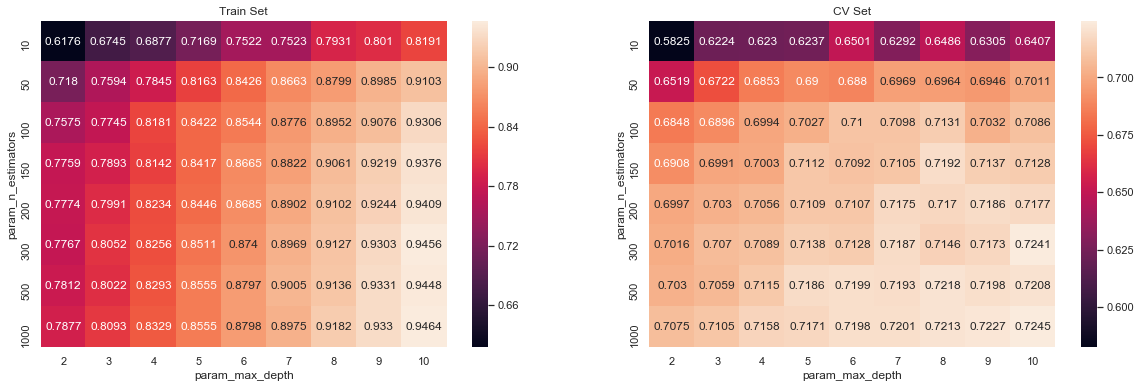

In [311]:
# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [312]:
# Print params
print(clf.best_estimator_)
print(clf.score(X_train_bow, y_train))
print(clf.score(X_test_bow, y_test))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
0.9172183676654633
0.7043009168412168


In [313]:
n_estimators = 1000
max_depth = 10

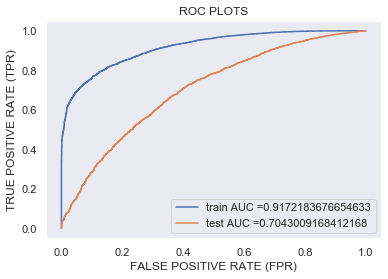

CPU times: user 43.5 s, sys: 828 ms, total: 44.4 s
Wall time: 1min 1s


In [314]:
%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':[max_depth], 'n_estimators':[n_estimators]}
rf=GridSearchCV(RandomForestClassifier(class_weight='balanced', n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1), parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
rf.fit(X_train_bow, y_train);

y_train_pred = clf.predict_proba(X_train_bow)[:,1]  
y_test_pred = clf.predict_proba(X_test_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

CPU times: user 13.6 s, sys: 236 ms, total: 13.9 s
Wall time: 8.6 s


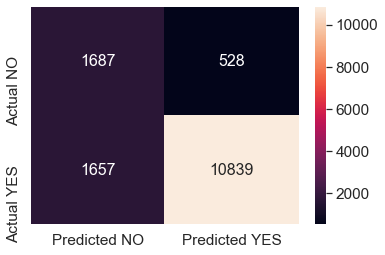

In [315]:
%%time
get_confusion_matrix(rf,X_train_bow,y_train)

CPU times: user 9.67 s, sys: 198 ms, total: 9.87 s
Wall time: 4.58 s


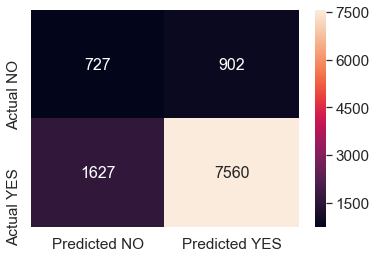

In [316]:
%%time
get_confusion_matrix(rf,X_test_bow,y_test)

In [317]:
%%time
# Train a model on above hyperparameter to select best features
rf_feature_selection = RandomForestClassifier(class_weight='balanced', n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1)
rf_feature_selection.fit(X_train_bow, y_train)
rf_feature_selection.feature_importances_

CPU times: user 23.7 s, sys: 720 ms, total: 24.5 s
Wall time: 14.7 s


array([0.00727337, 0.00735108, 0.00681443, ..., 0.02060005, 0.01528153,
       0.0187616 ])

In [318]:
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

# Calculate feature importances
importances = rf_feature_selection.feature_importances_
# Sort feature importances in descending order
indices_pos = np.argsort(importances)[::-1]

# Sort feature importances in asccending order
indices_neg = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances for positive class
names_pos = [feature_names_bow[i] for i in indices_pos]

# Rearrange feature names so they match the sorted feature importances for negative class
names_neg = [feature_names_bow[i] for i in indices_neg]

In [319]:
# process for top n features
n = 20

[0.026331933336934253, 0.02367404044767679, 0.020600053746364436, 0.018761596183043544, 0.015281527149479437, 0.00950312097978943, 0.008707417849634224, 0.008680095032457615, 0.00756095544512088, 0.007351075024355123, 0.007273367841931229, 0.006814429376444725, 0.006535722830858892, 0.006458334187670129, 0.006106948856383575, 0.005915810175130168, 0.005507670244642196, 0.004302400424120888, 0.004135010950606783, 0.004073100735093452]
****************************************************************************************************
['clean_subcategories_pos', 'clean_subcategories_neg', 'quantity', 'price', 'teacher_number_of_previously_posted_projects_norm', 'materials', 'supplies', 'materials', 'clean_categories_neg', 'school_state_neg', 'school_state_pos', 'clean_categories_pos', 'use', 'wobble', 'chromebooks', 'books', 'chairs', 'students', 'supplies', 'reading']
****************************************************************************************************


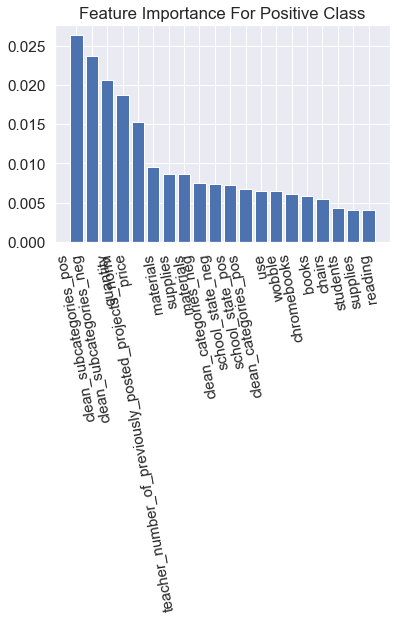

In [320]:
# collect n positive feature

# collect top n importance data
top_20_positive_data = []
for i in indices_pos:
    top_20_positive_data.append(importances[i])
    if(len(top_20_positive_data) >= n):
        break;

print(top_20_positive_data)
print("*"*100)

# collect top n importance label
top_20_positive_label = names_pos[0:n]

print(top_20_positive_label)
print("*"*100)

# Barplot: Add bars
plt.bar(range(n), top_20_positive_data)
# Add feature names as x-axis labels
plt.xticks(range(n), top_20_positive_label , rotation=100, fontsize = 15)
# Create plot title
plt.title("Feature Importance For Positive Class")
# Show plot
plt.show()

[4.724030407280267e-09, 3.5459442430600536e-08, 4.0799591018504394e-08, 4.530458336405595e-08, 5.2975635886083995e-08, 5.8481237432073735e-08, 6.17220916132652e-08, 7.16968200671659e-08, 7.566594213464851e-08, 9.865974997549917e-08, 1.246170478127686e-07, 1.3133319132394543e-07, 1.4675783834305262e-07, 1.589213448562151e-07, 1.8489239191015398e-07, 1.8999562174418277e-07, 1.923414231625342e-07, 2.0054795933282652e-07, 2.392824362049235e-07, 2.4565678820454505e-07]
****************************************************************************************************
['enriching', 'flexible seating options help', 'need non fiction', 'art supplies', 'video', 'comfortably', 'interest books', 'need new books', 'need recess', 'poor', 'socks', 'students need healthy snacks', 'fullest', 'novel', 'charger', 'light table', 'dr seuss', 'different', 'first day', 'reading intervention']
****************************************************************************************************


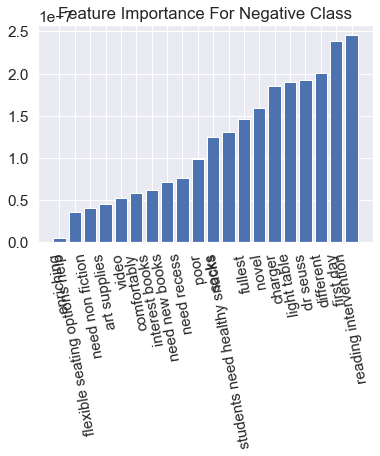

In [321]:
# collect n negative feature

# collect top n importance data
top_20_negative_data = []
collect_neg_indices = []
for i in indices_neg:
    if(importances[i] > 0):
        top_20_negative_data.append(importances[i])
        collect_neg_indices.append(i)
    if(len(top_20_negative_data) >= n):
        break;
        
print(top_20_negative_data)
print("*"*100)

# collect top n importance data     
top_20_negative_label = []
for i in collect_neg_indices:
    top_20_negative_label.append(names_neg[i])
    
print(top_20_negative_label)
print("*"*100)

# Barplot: Add bars
plt.bar(range(n), top_20_negative_data)
# Add feature names as x-axis labels
plt.xticks(range(n), top_20_negative_label , rotation=100, fontsize = 15)
# Create plot title
plt.title("Feature Importance For Negative Class")
# Show plot
plt.show()

### 2.4.2 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [322]:
%%time
# Please write all the code with proper documentation
# Prepare data for TFIDF
X_train_tfidf = hstack((X_train_school_state_pos, X_train_school_state_neg,  X_train_clean_categories_pos, X_train_clean_categories_neg, X_train_clean_subcategories_pos, X_train_clean_subcategories_neg, X_train_project_grade_category_pos, X_train_project_grade_category_neg, X_train_teacher_prefix_pos, X_train_teacher_prefix_neg, X_train_title_tfidf, X_train_essay_tfidf, X_train_project_resource_summary_tfidf, X_train_quantity_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_price_norm)).tocsr()
X_cv_tfidf = hstack((X_cv_school_state_pos, X_cv_school_state_neg, X_cv_clean_categories_pos, X_cv_clean_categories_neg, X_cv_clean_subcategories_pos, X_cv_clean_subcategories_neg, X_cv_project_grade_category_pos, X_cv_project_grade_category_neg, X_cv_teacher_prefix_pos, X_cv_teacher_prefix_neg, X_cv_title_tfidf, X_cv_essay_tfidf, X_cv_project_resource_summary_tfidf, X_cv_quantity_norm, X_cv_teacher_number_of_previously_posted_projects_norm, X_cv_price_norm)).tocsr()
X_test_tfidf = hstack((X_test_school_state_pos, X_test_school_state_neg, X_test_clean_categories_pos, X_test_clean_categories_neg, X_test_clean_subcategories_pos, X_test_clean_subcategories_neg, X_test_project_grade_category_pos,  X_test_project_grade_category_neg, X_test_teacher_prefix_pos, X_test_teacher_prefix_neg, X_test_title_tfidf, X_test_essay_tfidf, X_test_project_resource_summary_tfidf, X_test_quantity_norm, X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm)).tocsr()

print(X_train_tfidf.shape)
print(X_cv_tfidf.shape)
print(X_test_tfidf.shape)


import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf=GridSearchCV(rf, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_tfidf, y_train)

(14711, 10071)
(7247, 10071)
(10816, 10071)
CPU times: user 26.9 s, sys: 512 ms, total: 27.4 s
Wall time: 10min 49s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

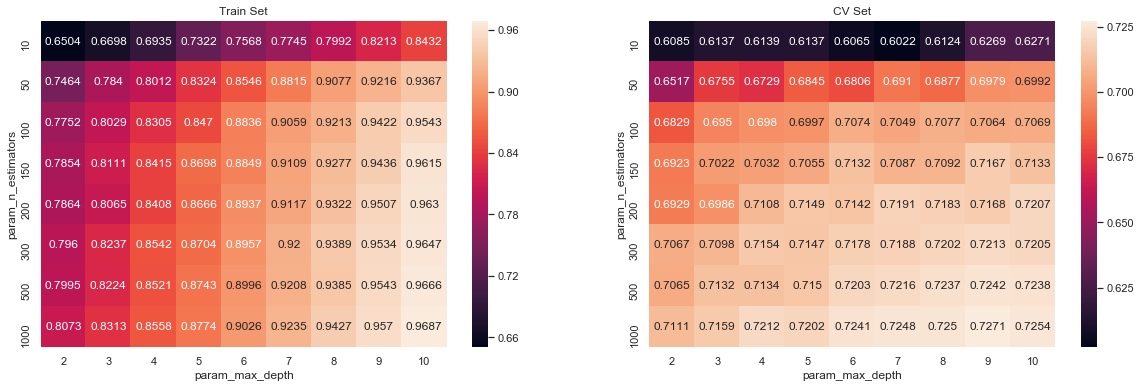

In [323]:
# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [324]:
# Print params
print(clf.best_estimator_)
print(clf.score(X_train_tfidf, y_train))
print(clf.score(X_test_tfidf, y_test))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
0.9299142226641194
0.7091140809841328


In [325]:
n_estimators = 1000
max_depth = 10

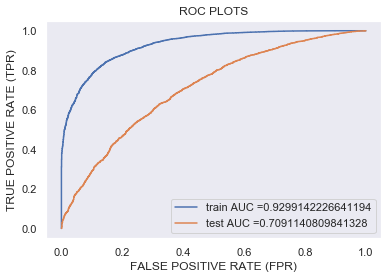

CPU times: user 40.2 s, sys: 726 ms, total: 40.9 s
Wall time: 46.8 s


In [326]:
%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':[max_depth], 'n_estimators':[n_estimators]}
rf=GridSearchCV(RandomForestClassifier(class_weight='balanced', n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1), parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
rf.fit(X_train_tfidf, y_train);

y_train_pred = clf.predict_proba(X_train_tfidf)[:,1]  
y_test_pred = clf.predict_proba(X_test_tfidf)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

CPU times: user 8.24 s, sys: 121 ms, total: 8.36 s
Wall time: 3.25 s


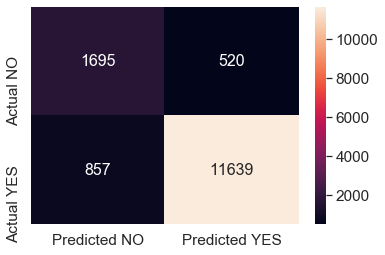

In [327]:
%%time
get_confusion_matrix(rf,X_train_tfidf,y_train)

CPU times: user 6.38 s, sys: 114 ms, total: 6.49 s
Wall time: 2.86 s


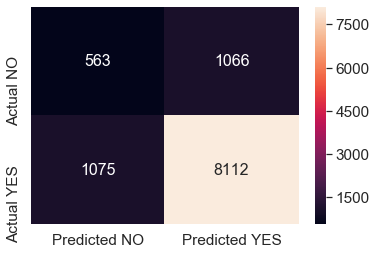

In [328]:
%%time
get_confusion_matrix(rf,X_test_tfidf,y_test)

In [329]:
%%time
# Train a model on above hyperparameter to select best features
rf_feature_selection = RandomForestClassifier(class_weight='balanced', n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1)
rf_feature_selection.fit(X_train_tfidf, y_train)
rf_feature_selection.feature_importances_

CPU times: user 26.5 s, sys: 476 ms, total: 27 s
Wall time: 10.7 s


array([0.00564628, 0.00633854, 0.00641493, ..., 0.01618556, 0.01078699,
       0.01696141])

In [330]:
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

# Calculate feature importances
importances = rf_feature_selection.feature_importances_
# Sort feature importances in descending order
indices_pos = np.argsort(importances)[::-1]

# Sort feature importances in asccending order
indices_neg = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances for positive class
names_pos = [feature_names_tfidf[i] for i in indices_pos]

# Rearrange feature names so they match the sorted feature importances for negative class
names_neg = [feature_names_tfidf[i] for i in indices_neg]

In [331]:
# process for top n features
n = 20

[0.02388569348456271, 0.02098447283244447, 0.01696141065903579, 0.016185561553855934, 0.012100496674058664, 0.010786992436094966, 0.010655334993992443, 0.009392511729585237, 0.008695271612570367, 0.007934021419129876, 0.006905389413091942, 0.00641493065688277, 0.006338544754344597, 0.006234325382121456, 0.006098518296696127, 0.005895154035009356, 0.005646276387120999, 0.005008126158841348, 0.004790594953613698, 0.004783900333657298]
****************************************************************************************************
['clean_subcategories_neg', 'clean_subcategories_pos', 'price', 'quantity', 'nannan', 'teacher_number_of_previously_posted_projects_norm', 'materials', 'materials', 'supplies', 'clean_categories_neg', 'supplies', 'clean_categories_pos', 'school_state_neg', 'chromebooks', 'use', 'chairs', 'school_state_pos', 'wobble', 'books', 'hands']
****************************************************************************************************


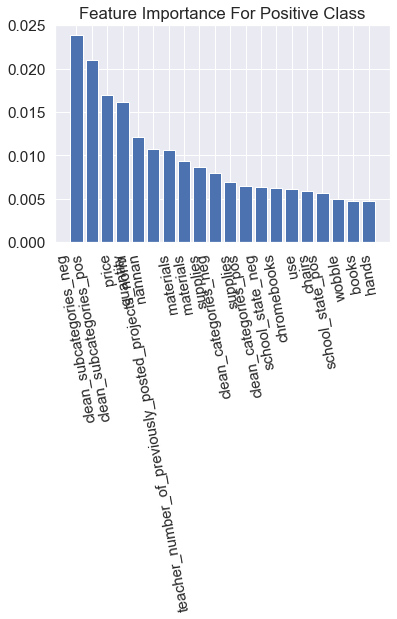

In [332]:
# collect n positive feature

# collect top n importance data
top_20_positive_data = []
for i in indices_pos:
    top_20_positive_data.append(importances[i])
    if(len(top_20_positive_data) >= n):
        break;

print(top_20_positive_data)
print("*"*100)

# collect top n importance label
top_20_positive_label = names_pos[0:n]

print(top_20_positive_label)
print("*"*100)

# Barplot: Add bars
plt.bar(range(n), top_20_positive_data)
# Add feature names as x-axis labels
plt.xticks(range(n), top_20_positive_label , rotation=100, fontsize = 15)
# Create plot title
plt.title("Feature Importance For Positive Class")
# Show plot
plt.show()

[1.0100386983508363e-09, 1.4496355263582026e-09, 1.6814544047211648e-09, 2.1255451547281227e-09, 5.802882451658276e-09, 1.2254253098773021e-08, 1.4722914953300233e-08, 1.4973170716250735e-08, 1.5254853225623342e-08, 1.794402183364072e-08, 1.9791987523195938e-08, 2.2276601282469166e-08, 2.5460615113996306e-08, 2.9529125076928686e-08, 3.2970829844695646e-08, 3.318136749488672e-08, 3.37809678788238e-08, 3.639388399454989e-08, 3.89090287699897e-08, 3.990171334115558e-08]
****************************************************************************************************
['years', 'defy', 'puts', 'groove', 'ends', 'dirt', 'eighth', 'prompt', 'low', 'stimulated', 'childhood', 'scholastic', 'highest', 'manipulatives', 'poetry', 'target', 'bright', 'pellet', 'comfortable', 'eyes']
****************************************************************************************************


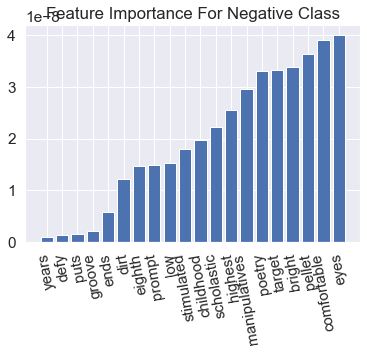

In [333]:
# collect n negative feature

# collect top n importance data
top_20_negative_data = []
collect_neg_indices = []
for i in indices_neg:
    if(importances[i] > 0):
        top_20_negative_data.append(importances[i])
        collect_neg_indices.append(i)
    if(len(top_20_negative_data) >= n):
        break;
        
print(top_20_negative_data)
print("*"*100)


# collect top n importance data     
top_20_negative_label = []
for i in collect_neg_indices:
    top_20_negative_label.append(names_neg[i])
    
print(top_20_negative_label)
print("*"*100)

# Barplot: Add bars
plt.bar(range(n), top_20_negative_data)
# Add feature names as x-axis labels
plt.xticks(range(n), top_20_negative_label , rotation=100, fontsize = 15)
# Create plot title
plt.title("Feature Importance For Negative Class")
# Show plot
plt.show()

### 2.4.3 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [101]:
%%time
# Please write all the code with proper documentation
# Prepare data for AVGW2V
X_train_avgw2v = hstack((X_train_school_state_pos, X_train_school_state_neg,  X_train_clean_categories_pos, X_train_clean_categories_neg, X_train_clean_subcategories_pos, X_train_clean_subcategories_neg, X_train_project_grade_category_pos, X_train_project_grade_category_neg, X_train_teacher_prefix_pos, X_train_teacher_prefix_neg, avg_w2v_vectors_text_train, avg_w2v_vectors_title_train, avg_w2v_vectors_project_resource_summary_train, X_train_quantity_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_price_norm)).tocsr()
X_cv_avgw2v = hstack((X_cv_school_state_pos, X_cv_school_state_neg, X_cv_clean_categories_pos, X_cv_clean_categories_neg, X_cv_clean_subcategories_pos, X_cv_clean_subcategories_neg, X_cv_project_grade_category_pos, X_cv_project_grade_category_neg, X_cv_teacher_prefix_pos, X_cv_teacher_prefix_neg, avg_w2v_vectors_text_cv, avg_w2v_vectors_title_cv, avg_w2v_vectors_project_resource_summary_cv, X_cv_quantity_norm, X_cv_teacher_number_of_previously_posted_projects_norm, X_cv_price_norm)).tocsr()
X_test_avgw2v = hstack((X_test_school_state_pos, X_test_school_state_neg, X_test_clean_categories_pos, X_test_clean_categories_neg, X_test_clean_subcategories_pos, X_test_clean_subcategories_neg, X_test_project_grade_category_pos,  X_test_project_grade_category_neg, X_test_teacher_prefix_pos, X_test_teacher_prefix_neg, avg_w2v_vectors_text_test, avg_w2v_vectors_title_test, avg_w2v_vectors_project_resource_summary_test, X_test_quantity_norm, X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm)).tocsr()


print(X_train_avgw2v.shape)
print(X_cv_avgw2v.shape)
print(X_test_avgw2v.shape)


import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf=GridSearchCV(rf, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_avgw2v, y_train)

(14711, 913)
(7247, 913)
(10816, 913)
CPU times: user 7min 2s, sys: 1.7 s, total: 7min 4s
Wall time: 8h 58min 30s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

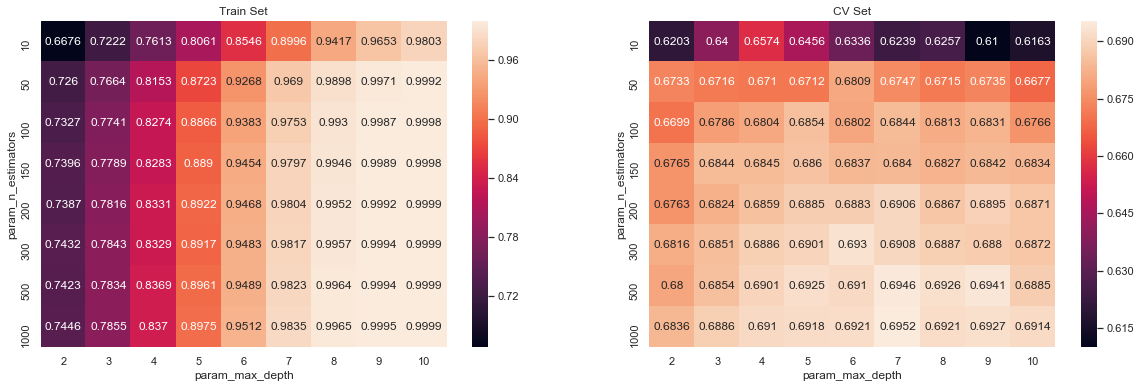

In [102]:
# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [103]:
# Print params
print(clf.best_estimator_)
print(clf.score(X_train_avgw2v, y_train))
print(clf.score(X_test_avgw2v, y_test))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
0.9592071986444379
0.7023769060203968


In [105]:
n_estimators = 1000
max_depth = 7

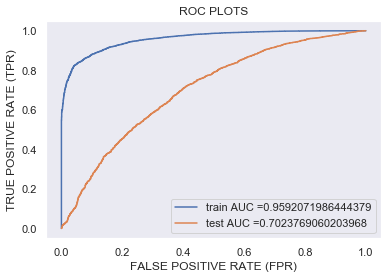

CPU times: user 8min 1s, sys: 2.5 s, total: 8min 3s
Wall time: 6min 34s


In [106]:
%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':[max_depth], 'n_estimators':[n_estimators]}
rf=GridSearchCV(RandomForestClassifier(class_weight='balanced', n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1), parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
rf.fit(X_train_avgw2v, y_train);

y_train_pred = clf.predict_proba(X_train_avgw2v)[:,1]  
y_test_pred = clf.predict_proba(X_test_avgw2v)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

CPU times: user 26.6 s, sys: 266 ms, total: 26.9 s
Wall time: 7.99 s


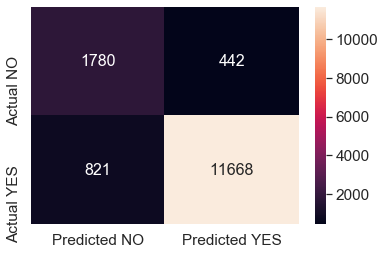

In [107]:
%%time
get_confusion_matrix(rf,X_train_avgw2v,y_train)

CPU times: user 19.2 s, sys: 211 ms, total: 19.4 s
Wall time: 5.74 s


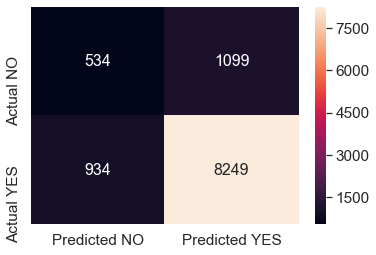

In [108]:
%%time
get_confusion_matrix(rf,X_test_avgw2v,y_test)

### 2.4.4 Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

In [132]:
%%time
# Please write all the code with proper documentation
# Prepare data for TFIDFW2V
X_train_tfidfw2v = hstack((X_train_school_state_pos, X_train_school_state_neg,  X_train_clean_categories_pos, X_train_clean_categories_neg, X_train_clean_subcategories_pos, X_train_clean_subcategories_neg, X_train_project_grade_category_pos, X_train_project_grade_category_neg, X_train_teacher_prefix_pos, X_train_teacher_prefix_neg, tfidf_w2v_vectors_text_train, tfidf_w2v_vectors_title_train, tfidf_w2v_vectors_project_resource_summary_train, X_train_quantity_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_price_norm)).tocsr()
X_cv_tfidfw2v = hstack((X_cv_school_state_pos, X_cv_school_state_neg, X_cv_clean_categories_pos, X_cv_clean_categories_neg, X_cv_clean_subcategories_pos, X_cv_clean_subcategories_neg, X_cv_project_grade_category_pos, X_cv_project_grade_category_neg, X_cv_teacher_prefix_pos, X_cv_teacher_prefix_neg, tfidf_w2v_vectors_text_cv, tfidf_w2v_vectors_title_cv, tfidf_w2v_vectors_project_resource_summary_cv, X_cv_quantity_norm, X_cv_teacher_number_of_previously_posted_projects_norm, X_cv_price_norm)).tocsr()
X_test_tfidfw2v = hstack((X_test_school_state_pos, X_test_school_state_neg, X_test_clean_categories_pos, X_test_clean_categories_neg, X_test_clean_subcategories_pos, X_test_clean_subcategories_neg, X_test_project_grade_category_pos,  X_test_project_grade_category_neg, X_test_teacher_prefix_pos, X_test_teacher_prefix_neg, tfidf_w2v_vectors_text_test, tfidf_w2v_vectors_title_test, tfidf_w2v_vectors_project_resource_summary_test, X_test_quantity_norm, X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm)).tocsr()


print(X_train_tfidfw2v.shape)
print(X_cv_tfidfw2v.shape)
print(X_test_tfidfw2v.shape)

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf=GridSearchCV(rf, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_tfidfw2v, y_train)

(14711, 913)
(7247, 913)
(10816, 913)
CPU times: user 5min 27s, sys: 2.32 s, total: 5min 30s
Wall time: 3h 33min 1s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

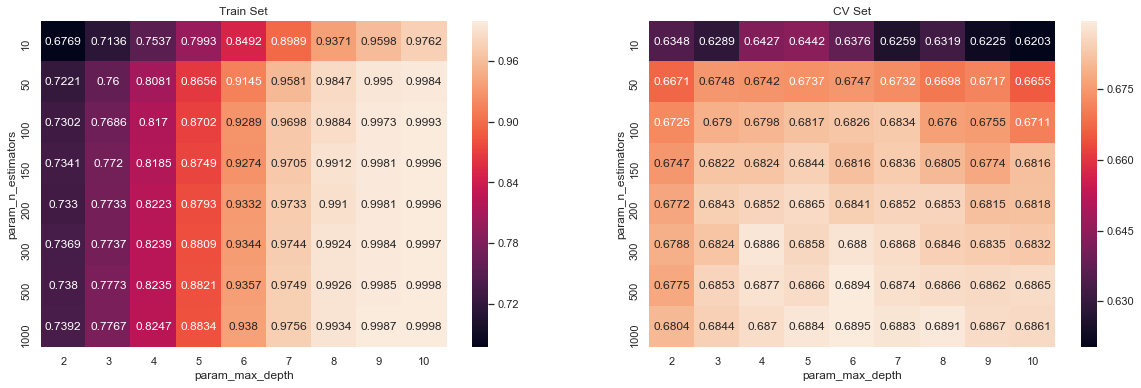

In [133]:
# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [134]:
# Print params
print(clf.best_estimator_)
print(clf.score(X_train_tfidfw2v, y_train))
print(clf.score(X_test_tfidfw2v, y_test))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
0.8979032781971448
0.6924932976407655


In [135]:
n_estimators = 1000
max_depth = 6

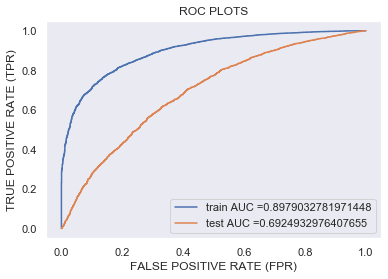

CPU times: user 6min 8s, sys: 1.14 s, total: 6min 10s
Wall time: 5min 16s


In [136]:
%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':[max_depth], 'n_estimators':[n_estimators]}
rf=GridSearchCV(RandomForestClassifier(class_weight='balanced', n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1), parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
rf.fit(X_train_tfidfw2v, y_train);

y_train_pred = clf.predict_proba(X_train_tfidfw2v)[:,1]  
y_test_pred = clf.predict_proba(X_test_tfidfw2v)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

CPU times: user 23 s, sys: 602 ms, total: 23.6 s
Wall time: 7.17 s


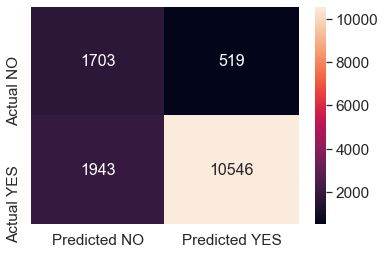

In [137]:
%%time
get_confusion_matrix(rf,X_train_tfidfw2v,y_train)

CPU times: user 16.3 s, sys: 127 ms, total: 16.4 s
Wall time: 4.48 s


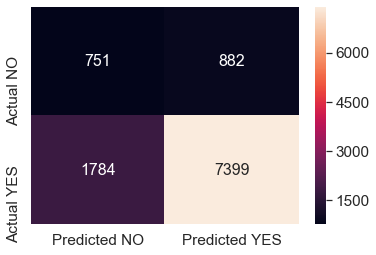

In [138]:
%%time
get_confusion_matrix(rf,X_test_tfidfw2v,y_test)

<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [109]:
%%time
# Please write all the code with proper documentation

# Prepare data for BOW
X_train_bow = hstack((X_train_school_state_pos, X_train_school_state_neg,  X_train_clean_categories_pos, X_train_clean_categories_neg, X_train_clean_subcategories_pos, X_train_clean_subcategories_neg, X_train_project_grade_category_pos, X_train_project_grade_category_neg, X_train_teacher_prefix_pos, X_train_teacher_prefix_neg, X_train_title_bow, X_train_essay_bow, X_train_project_resource_summary_bow, X_train_quantity_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_price_norm)).tocsr()
X_cv_bow = hstack((X_cv_school_state_pos, X_cv_school_state_neg, X_cv_clean_categories_pos, X_cv_clean_categories_neg, X_cv_clean_subcategories_pos, X_cv_clean_subcategories_neg, X_cv_project_grade_category_pos, X_cv_project_grade_category_neg, X_cv_teacher_prefix_pos, X_cv_teacher_prefix_neg, X_cv_title_bow, X_cv_essay_bow, X_cv_project_resource_summary_bow, X_cv_quantity_norm, X_cv_teacher_number_of_previously_posted_projects_norm, X_cv_price_norm)).tocsr()
X_test_bow = hstack((X_test_school_state_pos, X_test_school_state_neg, X_test_clean_categories_pos, X_test_clean_categories_neg, X_test_clean_subcategories_pos, X_test_clean_subcategories_neg, X_test_project_grade_category_pos,  X_test_project_grade_category_neg, X_test_teacher_prefix_pos, X_test_teacher_prefix_neg, X_test_title_bow, X_test_essay_bow, X_test_project_resource_summary_bow, X_test_quantity_norm, X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm)).tocsr()

print(X_train_bow.shape, y_train.shape)
print(X_cv_bow.shape, y_cv.shape)
print(X_test_bow.shape, y_test.shape)

import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

xgb = XGBClassifier(class_weight='balanced', n_jobs=-1)
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf=GridSearchCV(xgb, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_bow, y_train)

(14711, 10297) (14711,)
(7247, 10297) (7247,)
(10816, 10297) (10816,)
CPU times: user 57.1 s, sys: 582 ms, total: 57.7 s
Wall time: 2h 23min 51s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     class_weight='balanced',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators

In [110]:
# print results
clf.cv_results_

{'mean_fit_time': array([   2.79524485,    9.43027218,   16.1352423 ,   22.33804393,
          30.3830452 ,   46.51209712,   79.81964231,  160.01052785,
           3.51865443,   12.71859105,   20.17203482,   30.73062094,
          45.76393096,   61.84292674,  112.35918673,  220.19645007,
           3.22812931,   14.10237948,   28.95465748,   43.97654478,
          60.53410061,   84.12143501,  140.36739564,  310.88346863,
           4.75534431,   20.36359096,   40.32456072,   56.05845006,
          74.82564855,  120.46896005,  190.72452331,  376.97966766,
           5.337744  ,   21.84740504,   50.19408735,   65.1116937 ,
          90.90883255,  139.8322626 ,  220.12863731,  686.37745365,
           5.82620207,   26.77927597,   54.03178104,  327.46429666,
         599.71170433,  137.82622568,  218.98402007,  436.53152227,
           6.00144076,   26.13107403,   52.16250475,   75.72499569,
          96.38074795,  159.58858991,  264.78227202,  514.84462142,
           7.81324697,   31.306

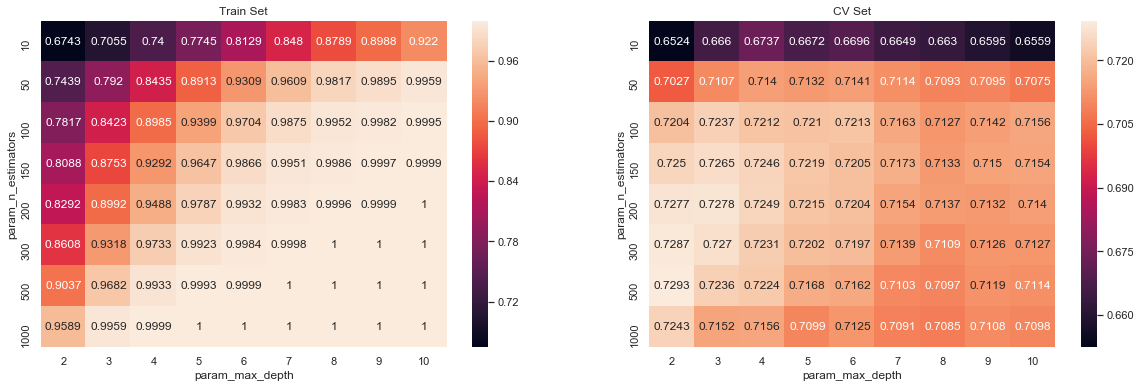

In [111]:
# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [112]:
# Print params
print(clf.best_estimator_)
print(clf.score(X_train_bow, y_train))
print(clf.score(X_test_bow, y_test))

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
0.8705188919084077
0.720202750909769


In [334]:
n_estimators = 500
max_depth = 2

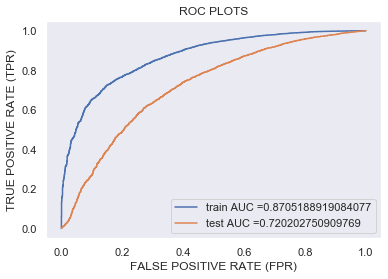

CPU times: user 51.3 s, sys: 394 ms, total: 51.7 s
Wall time: 1min 55s


In [114]:
%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':[max_depth], 'n_estimators':[n_estimators]}
xgb=GridSearchCV(XGBClassifier(class_weight='balanced', n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1), parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
xgb.fit(X_train_bow, y_train);

y_train_pred = clf.predict_proba(X_train_bow)[:,1]  
y_test_pred = clf.predict_proba(X_test_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

CPU times: user 634 ms, sys: 30.5 ms, total: 665 ms
Wall time: 672 ms


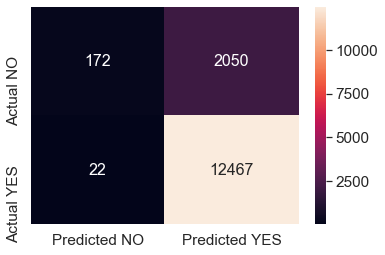

In [115]:
%%time
get_confusion_matrix(xgb,X_train_bow,y_train)

CPU times: user 484 ms, sys: 22 ms, total: 506 ms
Wall time: 509 ms


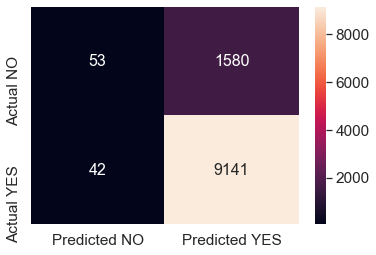

In [116]:
%%time
get_confusion_matrix(xgb,X_test_bow,y_test)

In [336]:
%%time
from xgboost import XGBClassifier
# Train a model on above hyperparameter to select best features
xgb_feature_selection = XGBClassifier(class_weight='balanced', n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1)
xgb_feature_selection.fit(X_train_bow, y_train)
xgb_feature_selection.feature_importances_

CPU times: user 55.7 s, sys: 442 ms, total: 56.1 s
Wall time: 59.7 s


array([0.00349855, 0.        , 0.00133162, ..., 0.00711722, 0.00464577,
       0.00693135], dtype=float32)

In [337]:
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

# Calculate feature importances
importances = xgb_feature_selection.feature_importances_
# Sort feature importances in descending order
indices_pos = np.argsort(importances)[::-1]

# Sort feature importances in asccending order
indices_neg = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances for positive class
names_pos = [feature_names_bow[i] for i in indices_pos]

# Rearrange feature names so they match the sorted feature importances for negative class
names_neg = [feature_names_bow[i] for i in indices_neg]

In [338]:
# process for top n features
n = 20

[0.0085176835, 0.007785931, 0.0071172155, 0.0069313548, 0.0065340674, 0.006097838, 0.00557561, 0.0051340763, 0.004645771, 0.0043550604, 0.0041668196, 0.004128658, 0.0040737395, 0.0039688707, 0.0038815043, 0.0038250992, 0.0037717978, 0.0037215052, 0.0036201498, 0.0036098238]
****************************************************************************************************
['materials', 'supplies', 'quantity', 'price', 'clean_subcategories_pos', 'equipment', 'use', 'wobble', 'teacher_number_of_previously_posted_projects_norm', 'paper', 'tools', 'chromebooks', 'books', 'educators', 'materials', 'stools', 'materials', 'worth', 'events', 'scholars']
****************************************************************************************************


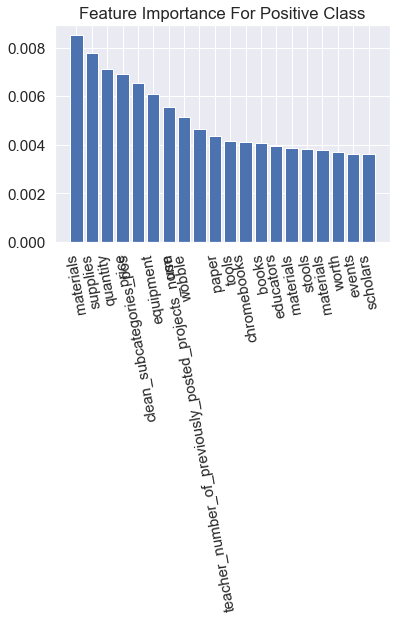

In [339]:
# collect n positive feature

# collect top n importance data
top_20_positive_data = []
for i in indices_pos:
    top_20_positive_data.append(importances[i])
    if(len(top_20_positive_data) >= n):
        break;

print(top_20_positive_data)
print("*"*100)

# collect top n importance label
top_20_positive_label = names_pos[0:n]

print(top_20_positive_label)
print("*"*100)

# Barplot: Add bars
plt.bar(range(n), top_20_positive_data)
# Add feature names as x-axis labels
plt.xticks(range(n), top_20_positive_label , rotation=100, fontsize = 15)
# Create plot title
plt.title("Feature Importance For Positive Class")
# Show plot
plt.show()

[0.00016181421, 0.0001717893, 0.00019614046, 0.00020639696, 0.00032587635, 0.00044913276, 0.00046302844, 0.0004734551, 0.0004897616, 0.00051184365, 0.0005776677, 0.0006421192, 0.0006526387, 0.0006545005, 0.0007516924, 0.0007634862, 0.0008068299, 0.00081551, 0.0008287739, 0.00083640416]
****************************************************************************************************
['themes', 'core', 'walls', 'need phonics', 'students need new', 'opportunities', 'applying', 'ipad mini tablets', 'anchor', 'eager learn new', 'need wiggle', 'students need headphones use', 'variety seating options', 'students need kindle fires', 'certainly control', 'students share', 'drive', 'binders', 'students thrive', 'eager learn students']
****************************************************************************************************


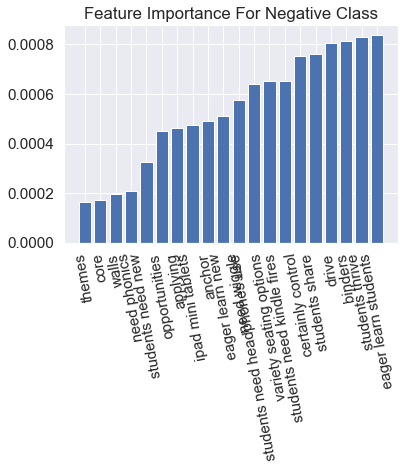

In [340]:
# collect n negative feature

# collect top n importance data
top_20_negative_data = []
collect_neg_indices = []
for i in indices_neg:
    if(importances[i] > 0):
        top_20_negative_data.append(importances[i])
        collect_neg_indices.append(i)
    if(len(top_20_negative_data) >= n):
        break;
        
print(top_20_negative_data)
print("*"*100)

# collect top n importance data     
top_20_negative_label = []
for i in collect_neg_indices:
    top_20_negative_label.append(names_neg[i])
    
print(top_20_negative_label)
print("*"*100)

# Barplot: Add bars
plt.bar(range(n), top_20_negative_data)
# Add feature names as x-axis labels
plt.xticks(range(n), top_20_negative_label , rotation=100, fontsize = 15)
# Create plot title
plt.title("Feature Importance For Negative Class")
# Show plot
plt.show()

### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [117]:
%%time
# Please write all the code with proper documentation
# Prepare data for TFIDF
X_train_tfidf = hstack((X_train_school_state_pos, X_train_school_state_neg,  X_train_clean_categories_pos, X_train_clean_categories_neg, X_train_clean_subcategories_pos, X_train_clean_subcategories_neg, X_train_project_grade_category_pos, X_train_project_grade_category_neg, X_train_teacher_prefix_pos, X_train_teacher_prefix_neg, X_train_title_tfidf, X_train_essay_tfidf, X_train_project_resource_summary_tfidf, X_train_quantity_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_price_norm)).tocsr()
X_cv_tfidf = hstack((X_cv_school_state_pos, X_cv_school_state_neg, X_cv_clean_categories_pos, X_cv_clean_categories_neg, X_cv_clean_subcategories_pos, X_cv_clean_subcategories_neg, X_cv_project_grade_category_pos, X_cv_project_grade_category_neg, X_cv_teacher_prefix_pos, X_cv_teacher_prefix_neg, X_cv_title_tfidf, X_cv_essay_tfidf, X_cv_project_resource_summary_tfidf, X_cv_quantity_norm, X_cv_teacher_number_of_previously_posted_projects_norm, X_cv_price_norm)).tocsr()
X_test_tfidf = hstack((X_test_school_state_pos, X_test_school_state_neg, X_test_clean_categories_pos, X_test_clean_categories_neg, X_test_clean_subcategories_pos, X_test_clean_subcategories_neg, X_test_project_grade_category_pos,  X_test_project_grade_category_neg, X_test_teacher_prefix_pos, X_test_teacher_prefix_neg, X_test_title_tfidf, X_test_essay_tfidf, X_test_project_resource_summary_tfidf, X_test_quantity_norm, X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm)).tocsr()

print(X_train_tfidf.shape)
print(X_cv_tfidf.shape)
print(X_test_tfidf.shape)


import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

xgb = XGBClassifier(class_weight='balanced', n_jobs=-1)
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf=GridSearchCV(xgb, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_tfidf, y_train)

(14711, 10072)
(7247, 10072)
(10816, 10072)
CPU times: user 37.8 s, sys: 410 ms, total: 38.2 s
Wall time: 22h 21min 12s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     class_weight='balanced',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators

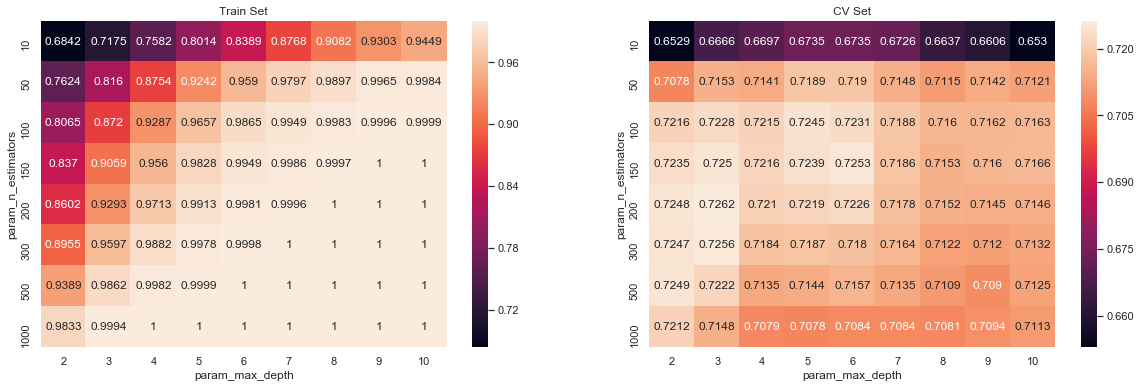

In [118]:
# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [119]:
# Print params
print(clf.best_estimator_)
print(clf.score(X_train_tfidf, y_train))
print(clf.score(X_test_tfidf, y_test))

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
0.8968451733475054
0.7184091200232278


In [341]:
n_estimators = 200
max_depth = 3

In [ ]:
%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':[max_depth], 'n_estimators':[n_estimators]}
xgb=GridSearchCV(XGBClassifier(class_weight='balanced', n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1), parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
xgb.fit(X_train_tfidf, y_train);

y_train_pred = clf.predict_proba(X_train_tfidf)[:,1]  
y_test_pred = clf.predict_proba(X_test_tfidf)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

CPU times: user 513 ms, sys: 24.2 ms, total: 538 ms
Wall time: 541 ms


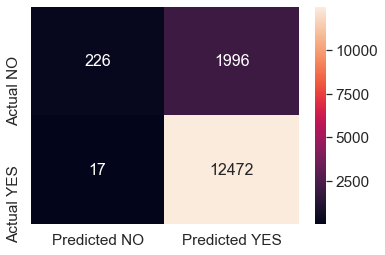

In [125]:
%%time
get_confusion_matrix(xgb,X_train_tfidf,y_train)

CPU times: user 431 ms, sys: 39.1 ms, total: 470 ms
Wall time: 494 ms


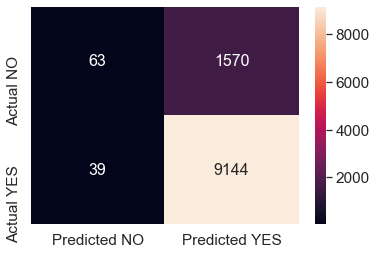

In [126]:
%%time
get_confusion_matrix(xgb,X_test_tfidf,y_test)

In [342]:
%%time
from xgboost import XGBClassifier
# Train a model on above hyperparameter to select best features
xgb_feature_selection = XGBClassifier(class_weight='balanced', n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1)
xgb_feature_selection.fit(X_train_tfidf, y_train)
xgb_feature_selection.feature_importances_

CPU times: user 47.8 s, sys: 425 ms, total: 48.2 s
Wall time: 51.3 s


array([0.00331598, 0.        , 0.00140907, ..., 0.00608898, 0.00459591,
       0.00659823], dtype=float32)

In [343]:
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

# Calculate feature importances
importances = xgb_feature_selection.feature_importances_
# Sort feature importances in descending order
indices_pos = np.argsort(importances)[::-1]

# Sort feature importances in asccending order
indices_neg = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances for positive class
names_pos = [feature_names_tfidf[i] for i in indices_pos]

# Rearrange feature names so they match the sorted feature importances for negative class
names_neg = [feature_names_tfidf[i] for i in indices_neg]

In [344]:
# process for top n features
n = 20

[0.008084392, 0.007212308, 0.0068307333, 0.0065982286, 0.006088976, 0.0057069752, 0.0056994497, 0.0048559345, 0.004795042, 0.004702217, 0.00468814, 0.0046605607, 0.004595907, 0.0045837476, 0.004491148, 0.0044378703, 0.004341614, 0.004304234, 0.004251539, 0.00422752]
****************************************************************************************************
['materials', 'materials', 'clean_subcategories_pos', 'price', 'quantity', 'equipment', 'nannan', 'area', 'grow', 'wobble', 'supplies', 'supplies', 'teacher_number_of_previously_posted_projects_norm', 'future', 'tools', 'build', 'stools', 'books', 'chromebooks', 'seating']
****************************************************************************************************


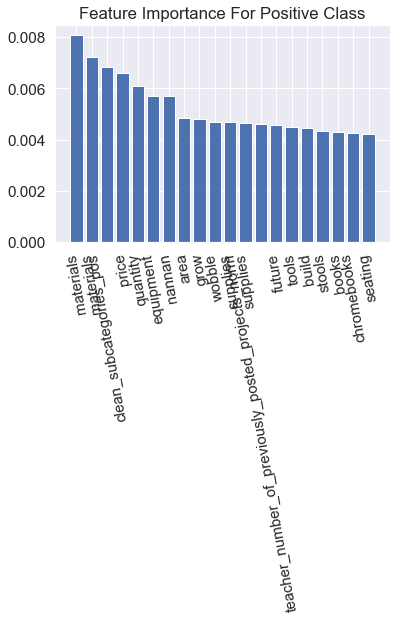

In [345]:
# collect n positive feature

# collect top n importance data
top_20_positive_data = []
for i in indices_pos:
    top_20_positive_data.append(importances[i])
    if(len(top_20_positive_data) >= n):
        break;

print(top_20_positive_data)
print("*"*100)

# collect top n importance label
top_20_positive_label = names_pos[0:n]

print(top_20_positive_label)
print("*"*100)

# Barplot: Add bars
plt.bar(range(n), top_20_positive_data)
# Add feature names as x-axis labels
plt.xticks(range(n), top_20_positive_label , rotation=100, fontsize = 15)
# Create plot title
plt.title("Feature Importance For Positive Class")
# Show plot
plt.show()

[9.292743e-05, 0.00015012757, 0.00016106894, 0.00016453672, 0.00018180761, 0.00018269985, 0.00018389258, 0.00018649247, 0.00020408655, 0.00027387298, 0.0003229957, 0.00039613864, 0.0004894801, 0.00053861097, 0.0005395893, 0.00055635575, 0.0006508971, 0.000658669, 0.0006948462, 0.0008917722]
****************************************************************************************************
['stability', 'jazz', 'learners', 'life', 'toughest', 'slides', 'communities', 'concepts', 'week', 'village', 'spanish', 'attentive', 'annotating', 'monthly', 'zoo', 'board', 'saving', 'lcd', 'lounge', 'pastels']
****************************************************************************************************


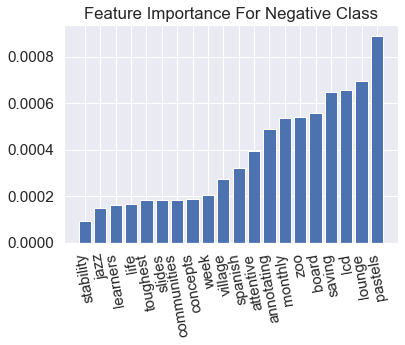

In [346]:
# collect n negative feature

# collect top n importance data
top_20_negative_data = []
collect_neg_indices = []
for i in indices_neg:
    if(importances[i] > 0):
        top_20_negative_data.append(importances[i])
        collect_neg_indices.append(i)
    if(len(top_20_negative_data) >= n):
        break;
        
print(top_20_negative_data)
print("*"*100)

# collect top n importance data     
top_20_negative_label = []
for i in collect_neg_indices:
    top_20_negative_label.append(names_neg[i])
    
print(top_20_negative_label)
print("*"*100)

# Barplot: Add bars
plt.bar(range(n), top_20_negative_data)
# Add feature names as x-axis labels
plt.xticks(range(n), top_20_negative_label , rotation=100, fontsize = 15)
# Create plot title
plt.title("Feature Importance For Negative Class")
# Show plot
plt.show()

### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [120]:
%%time
# Please write all the code with proper documentation
# Prepare data for AVGW2V
X_train_avgw2v = hstack((X_train_school_state_pos, X_train_school_state_neg,  X_train_clean_categories_pos, X_train_clean_categories_neg, X_train_clean_subcategories_pos, X_train_clean_subcategories_neg, X_train_project_grade_category_pos, X_train_project_grade_category_neg, X_train_teacher_prefix_pos, X_train_teacher_prefix_neg, avg_w2v_vectors_text_train, avg_w2v_vectors_title_train, avg_w2v_vectors_project_resource_summary_train, X_train_quantity_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_price_norm)).tocsr()
X_cv_avgw2v = hstack((X_cv_school_state_pos, X_cv_school_state_neg, X_cv_clean_categories_pos, X_cv_clean_categories_neg, X_cv_clean_subcategories_pos, X_cv_clean_subcategories_neg, X_cv_project_grade_category_pos, X_cv_project_grade_category_neg, X_cv_teacher_prefix_pos, X_cv_teacher_prefix_neg, avg_w2v_vectors_text_cv, avg_w2v_vectors_title_cv, avg_w2v_vectors_project_resource_summary_cv, X_cv_quantity_norm, X_cv_teacher_number_of_previously_posted_projects_norm, X_cv_price_norm)).tocsr()
X_test_avgw2v = hstack((X_test_school_state_pos, X_test_school_state_neg, X_test_clean_categories_pos, X_test_clean_categories_neg, X_test_clean_subcategories_pos, X_test_clean_subcategories_neg, X_test_project_grade_category_pos,  X_test_project_grade_category_neg, X_test_teacher_prefix_pos, X_test_teacher_prefix_neg, avg_w2v_vectors_text_test, avg_w2v_vectors_title_test, avg_w2v_vectors_project_resource_summary_test, X_test_quantity_norm, X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm)).tocsr()


print(X_train_avgw2v.shape)
print(X_cv_avgw2v.shape)
print(X_test_avgw2v.shape)


import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

xgb = XGBClassifier(class_weight='balanced', n_jobs=-1)
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf=GridSearchCV(xgb, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_avgw2v, y_train)

(14711, 913)
(7247, 913)
(10816, 913)
CPU times: user 3min 43s, sys: 2.89 s, total: 3min 46s
Wall time: 1d 5h 58min 30s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     class_weight='balanced',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators

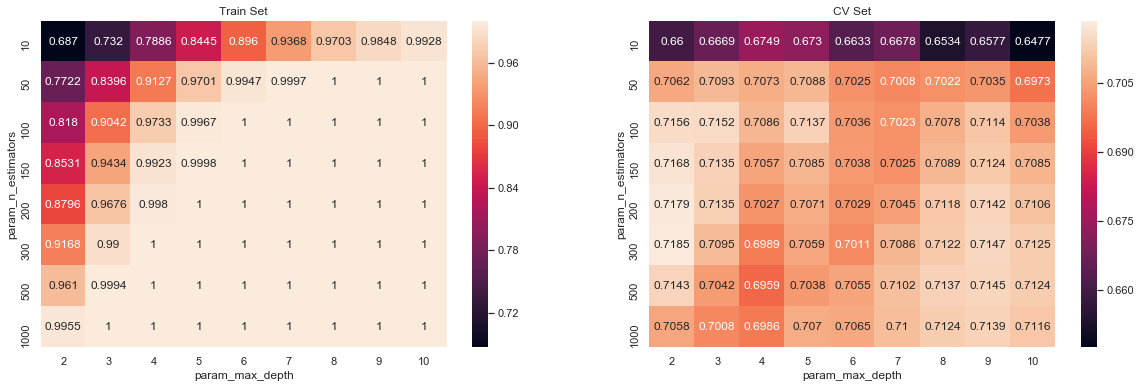

In [121]:
# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [122]:
# Print params
print(clf.best_estimator_)
print(clf.score(X_train_avgw2v, y_train))
print(clf.score(X_test_avgw2v, y_test))

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
0.8751476997327405
0.7144886324799833


In [127]:
n_estimators = 300
max_depth = 2

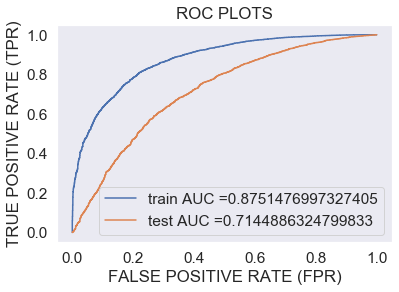

CPU times: user 3min 29s, sys: 1.19 s, total: 3min 30s
Wall time: 7min 30s


In [128]:
%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':[max_depth], 'n_estimators':[n_estimators]}
xgb=GridSearchCV(XGBClassifier(class_weight='balanced', n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1), parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
xgb.fit(X_train_avgw2v, y_train);

y_train_pred = clf.predict_proba(X_train_avgw2v)[:,1]  
y_test_pred = clf.predict_proba(X_test_avgw2v)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

CPU times: user 3.23 s, sys: 210 ms, total: 3.44 s
Wall time: 3.49 s


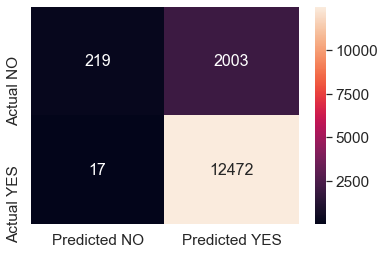

In [129]:
%%time
get_confusion_matrix(xgb,X_train_avgw2v,y_train)

CPU times: user 2.53 s, sys: 135 ms, total: 2.66 s
Wall time: 3.08 s


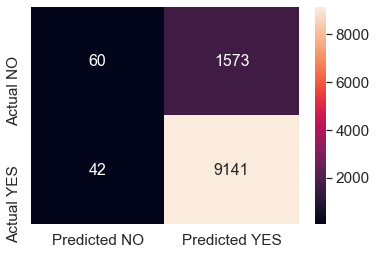

In [130]:
%%time
get_confusion_matrix(xgb,X_test_avgw2v,y_test)

### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [139]:
%%time
# Please write all the code with proper documentation
# Prepare data for TFIDFW2V
X_train_tfidfw2v = hstack((X_train_school_state_pos, X_train_school_state_neg,  X_train_clean_categories_pos, X_train_clean_categories_neg, X_train_clean_subcategories_pos, X_train_clean_subcategories_neg, X_train_project_grade_category_pos, X_train_project_grade_category_neg, X_train_teacher_prefix_pos, X_train_teacher_prefix_neg, tfidf_w2v_vectors_text_train, tfidf_w2v_vectors_title_train, tfidf_w2v_vectors_project_resource_summary_train, X_train_quantity_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_price_norm)).tocsr()
X_cv_tfidfw2v = hstack((X_cv_school_state_pos, X_cv_school_state_neg, X_cv_clean_categories_pos, X_cv_clean_categories_neg, X_cv_clean_subcategories_pos, X_cv_clean_subcategories_neg, X_cv_project_grade_category_pos, X_cv_project_grade_category_neg, X_cv_teacher_prefix_pos, X_cv_teacher_prefix_neg, tfidf_w2v_vectors_text_cv, tfidf_w2v_vectors_title_cv, tfidf_w2v_vectors_project_resource_summary_cv, X_cv_quantity_norm, X_cv_teacher_number_of_previously_posted_projects_norm, X_cv_price_norm)).tocsr()
X_test_tfidfw2v = hstack((X_test_school_state_pos, X_test_school_state_neg, X_test_clean_categories_pos, X_test_clean_categories_neg, X_test_clean_subcategories_pos, X_test_clean_subcategories_neg, X_test_project_grade_category_pos,  X_test_project_grade_category_neg, X_test_teacher_prefix_pos, X_test_teacher_prefix_neg, tfidf_w2v_vectors_text_test, tfidf_w2v_vectors_title_test, tfidf_w2v_vectors_project_resource_summary_test, X_test_quantity_norm, X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm)).tocsr()


print(X_train_tfidfw2v.shape)
print(X_cv_tfidfw2v.shape)
print(X_test_tfidfw2v.shape)


import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

xgb = XGBClassifier(class_weight='balanced', n_jobs=-1)
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf=GridSearchCV(xgb, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_tfidfw2v, y_train)

(14711, 913)
(7247, 913)
(10816, 913)
CPU times: user 2min 27s, sys: 1.97 s, total: 2min 29s
Wall time: 13h 31min 26s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     class_weight='balanced',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators

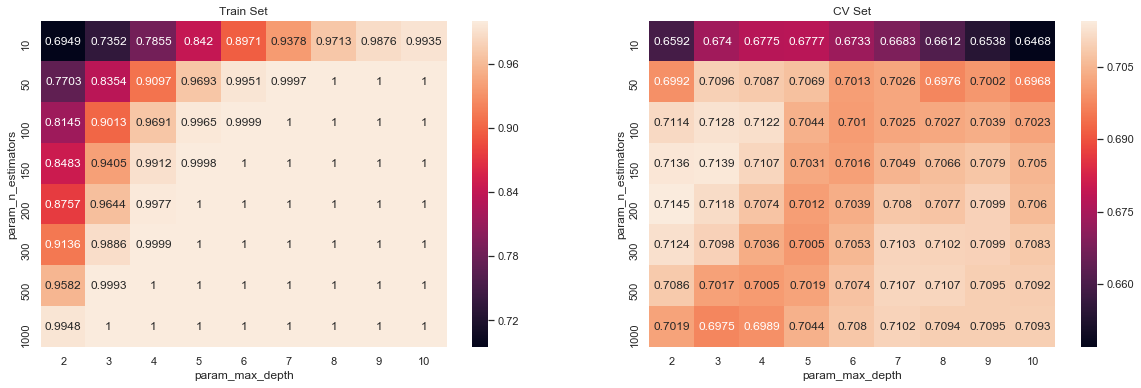

In [140]:
# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [141]:
# Print params
print(clf.best_estimator_)
print(clf.score(X_train_tfidfw2v, y_train))
print(clf.score(X_test_tfidfw2v, y_test))

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
0.8370357273536626
0.7047620343216543


In [142]:
n_estimators = 200
max_depth = 2

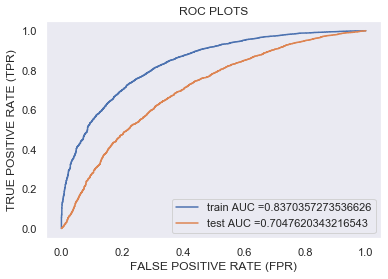

CPU times: user 2min 32s, sys: 1.55 s, total: 2min 34s
Wall time: 5min 49s


In [143]:
%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':[max_depth], 'n_estimators':[n_estimators]}
xgb=GridSearchCV(XGBClassifier(class_weight='balanced', n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1), parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
xgb.fit(X_train_tfidfw2v, y_train);

y_train_pred = clf.predict_proba(X_train_tfidfw2v)[:,1]  
y_test_pred = clf.predict_proba(X_test_tfidfw2v)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

CPU times: user 3.37 s, sys: 226 ms, total: 3.6 s
Wall time: 3.89 s


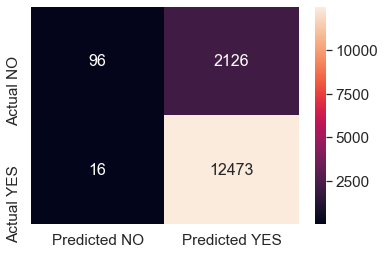

In [144]:
%%time
get_confusion_matrix(xgb,X_train_tfidfw2v,y_train)

CPU times: user 2.49 s, sys: 129 ms, total: 2.62 s
Wall time: 2.69 s


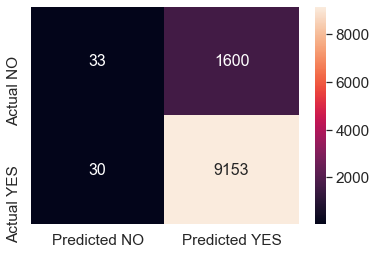

In [145]:
%%time
get_confusion_matrix(xgb,X_test_tfidfw2v,y_test)

<h1>3. Conclusion</h1>

In [348]:
# Please compare all your models using Prettytable library
# Please compare all your models using Prettytable library
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "N Estimators", "Max Depth", "AUC"]
x.add_row(["Bag of Words", "Random Forest", 500, 10, 0.70])
x.add_row(["TFIDF", "Random Forest", 1000, 10, .71])
x.add_row(["AVG W2V", "Random Forest", 1000, 7, .70])
x.add_row(["TFIDF W2V", "Random Forest", 1000, 6, .69])
x.add_row(["Bag of Words", "XGBOOST", 500, 2, .72])
x.add_row(["TFIDF", "XGBOOST", 200, 3, .72])
x.add_row(["AVG W2V", "XGBOOST", 300, 2, .71])
x.add_row(["TFIDF W2V", "XGBOOST", 200, 2, 0.70])


print(x)

+--------------+---------------+--------------+-----------+------+
|  Vectorizer  |     Model     | N Estimators | Max Depth | AUC  |
+--------------+---------------+--------------+-----------+------+
| Bag of Words | Random Forest |     500      |     10    | 0.7  |
|    TFIDF     | Random Forest |     1000     |     10    | 0.71 |
|   AVG W2V    | Random Forest |     1000     |     7     | 0.7  |
|  TFIDF W2V   | Random Forest |     1000     |     6     | 0.69 |
| Bag of Words |    XGBOOST    |     500      |     2     | 0.72 |
|    TFIDF     |    XGBOOST    |     200      |     3     | 0.72 |
|   AVG W2V    |    XGBOOST    |     300      |     2     | 0.71 |
|  TFIDF W2V   |    XGBOOST    |     200      |     2     | 0.7  |
+--------------+---------------+--------------+-----------+------+
